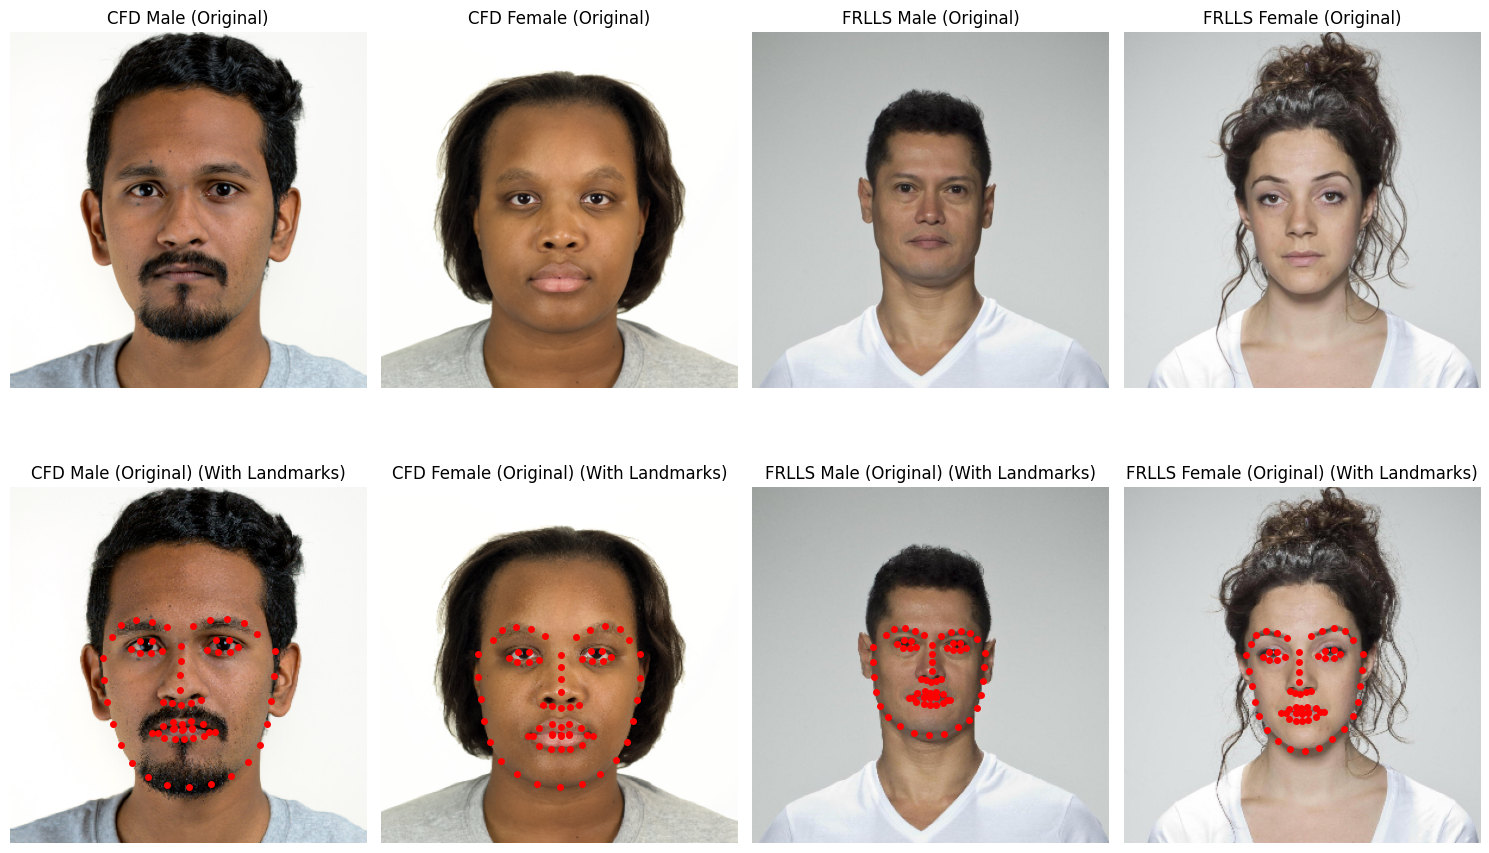

In [1]:
# This script loads and displays specified male and female images from the CFD and FRLLS datasets.
# It presents the images in a structured, two-row format:
# - Row 1: Original images without landmarks.
# - Row 2: Images with Dlib's 68 facial landmarks overlaid for visual analysis.
# 
# Key Steps:
# 1. Load Dlib's face detector and shape predictor model to facilitate landmark extraction.
# 2. Define helper functions to:
#    - Extract 68 facial landmarks from each face.
#    - Adjust images to a consistent aspect ratio for uniform display.
#    - Display each image with or without landmarks.
# 3. Load specific male and female images from each dataset (CFD and FRLLS).
# 4. Display images side-by-side in a grid, ensuring consistent aspect ratio and alignment for visual comparison.

import os
import cv2
import dlib
import numpy as np
import matplotlib.pyplot as plt

# Load dlib's face detector and shape predictor
detector = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor('shape_predictor_68_face_landmarks.dat')

# Define a function to extract facial landmarks from a grayscale image
def get_landmarks(gray_image):
    faces = detector(gray_image)
    if len(faces) > 0:
        landmarks = predictor(gray_image, faces[0])  # Use the first detected face
        coords = [(landmarks.part(n).x, landmarks.part(n).y) for n in range(68)]
        return coords
    return None

# Function to crop image to a target aspect ratio
def crop_to_aspect_ratio(image, target_aspect_ratio=1.0):
    h, w = image.shape[:2]
    current_aspect_ratio = w / h
    if current_aspect_ratio > target_aspect_ratio:
        # Wider than target aspect ratio; crop width
        new_width = int(h * target_aspect_ratio)
        start_x = (w - new_width) // 2
        return image[:, start_x:start_x + new_width]
    elif current_aspect_ratio < target_aspect_ratio:
        # Taller than target aspect ratio; crop height
        new_height = int(w / target_aspect_ratio)
        start_y = (h - new_height) // 2
        return image[start_y:start_y + new_height, :]
    return image  # Aspect ratio already matches

# Function to display an image with landmarks overlaid
def display_image_with_landmarks(image, landmarks, title, target_width=300):
    # Resize to a consistent width for display
    h, w = image.shape[:2]
    aspect_ratio = w / h
    target_height = int(target_width / aspect_ratio)
    image_resized = cv2.resize(image, (target_width, target_height))

    # Display image with landmarks
    plt.imshow(cv2.cvtColor(image_resized, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.title(title)
    for (x, y) in landmarks:
        plt.plot(x * target_width / w, y * target_height / h, 'ro', markersize=4)

# Load images and display them side by side
cfd_folder = 'CFD_extracted_neutral'
frlls_folder = 'neutral_front'

cfd_images = [('CFD Male (Original)', 'IM-603.jpg'), ('CFD Female (Original)', 'BF-001.jpg')]
frlls_images = [('FRLLS Male (Original)', '024_03.jpg'), ('FRLLS Female (Original)', '001_03.jpg')]

# Target aspect ratio (e.g., FRLLS image aspect ratio)
target_aspect_ratio = 1350 / 1350

# Display images
plt.figure(figsize=(15, 10))

# Display original images
for i, (title, filename) in enumerate(cfd_images + frlls_images):
    folder = cfd_folder if 'CFD' in title else frlls_folder
    image_path = os.path.join(folder, filename)
    image = cv2.imread(image_path)
    image_cropped = crop_to_aspect_ratio(image, target_aspect_ratio)
    plt.subplot(2, 4, i + 1)
    plt.imshow(cv2.cvtColor(image_cropped, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.title(title)

# Display images with landmarks
for i, (title, filename) in enumerate(cfd_images + frlls_images):
    folder = cfd_folder if 'CFD' in title else frlls_folder
    image_path = os.path.join(folder, filename)
    image = cv2.imread(image_path)
    image_cropped = crop_to_aspect_ratio(image, target_aspect_ratio)
    gray_image = cv2.cvtColor(image_cropped, cv2.COLOR_BGR2GRAY)
    landmarks = get_landmarks(gray_image)
    plt.subplot(2, 4, i + 5)
    display_image_with_landmarks(image_cropped, landmarks, f"{title} (With Landmarks)")

plt.tight_layout()
plt.show()


Facial landmarks extracted from: CFD_extracted_neutral/AF-200.jpg
Facial Landmarks: ['0:(816, 810)', '1:(824, 907)', '2:(842, 1004)', '3:(865, 1097)', '4:(895, 1188)', '5:(947, 1265)', '6:(1033, 1319)', '7:(1125, 1359)', '8:(1226, 1375)', '9:(1326, 1359)', '10:(1418, 1319)', '11:(1502, 1265)', '12:(1557, 1191)', '13:(1588, 1099)', '14:(1608, 1001)', '15:(1625, 903)', '16:(1636, 801)', '17:(889, 697)', '18:(941, 652)', '19:(1011, 638)', '20:(1079, 657)', '21:(1138, 695)', '22:(1277, 689)', '23:(1339, 646)', '24:(1413, 625)', '25:(1489, 639)', '26:(1546, 685)', '27:(1208, 786)', '28:(1208, 851)', '29:(1207, 915)', '30:(1206, 981)', '31:(1135, 1039)', '32:(1171, 1047)', '33:(1210, 1053)', '34:(1249, 1047)', '35:(1287, 1039)', '36:(958, 796)', '37:(997, 759)', '38:(1051, 764)', '39:(1097, 820)', '40:(1047, 827)', '41:(991, 823)', '42:(1331, 815)', '43:(1372, 759)', '44:(1428, 753)', '45:(1473, 787)', '46:(1436, 816)', '47:(1379, 822)', '48:(1084, 1174)', '49:(1131, 1132)', '50:(1179, 1106)

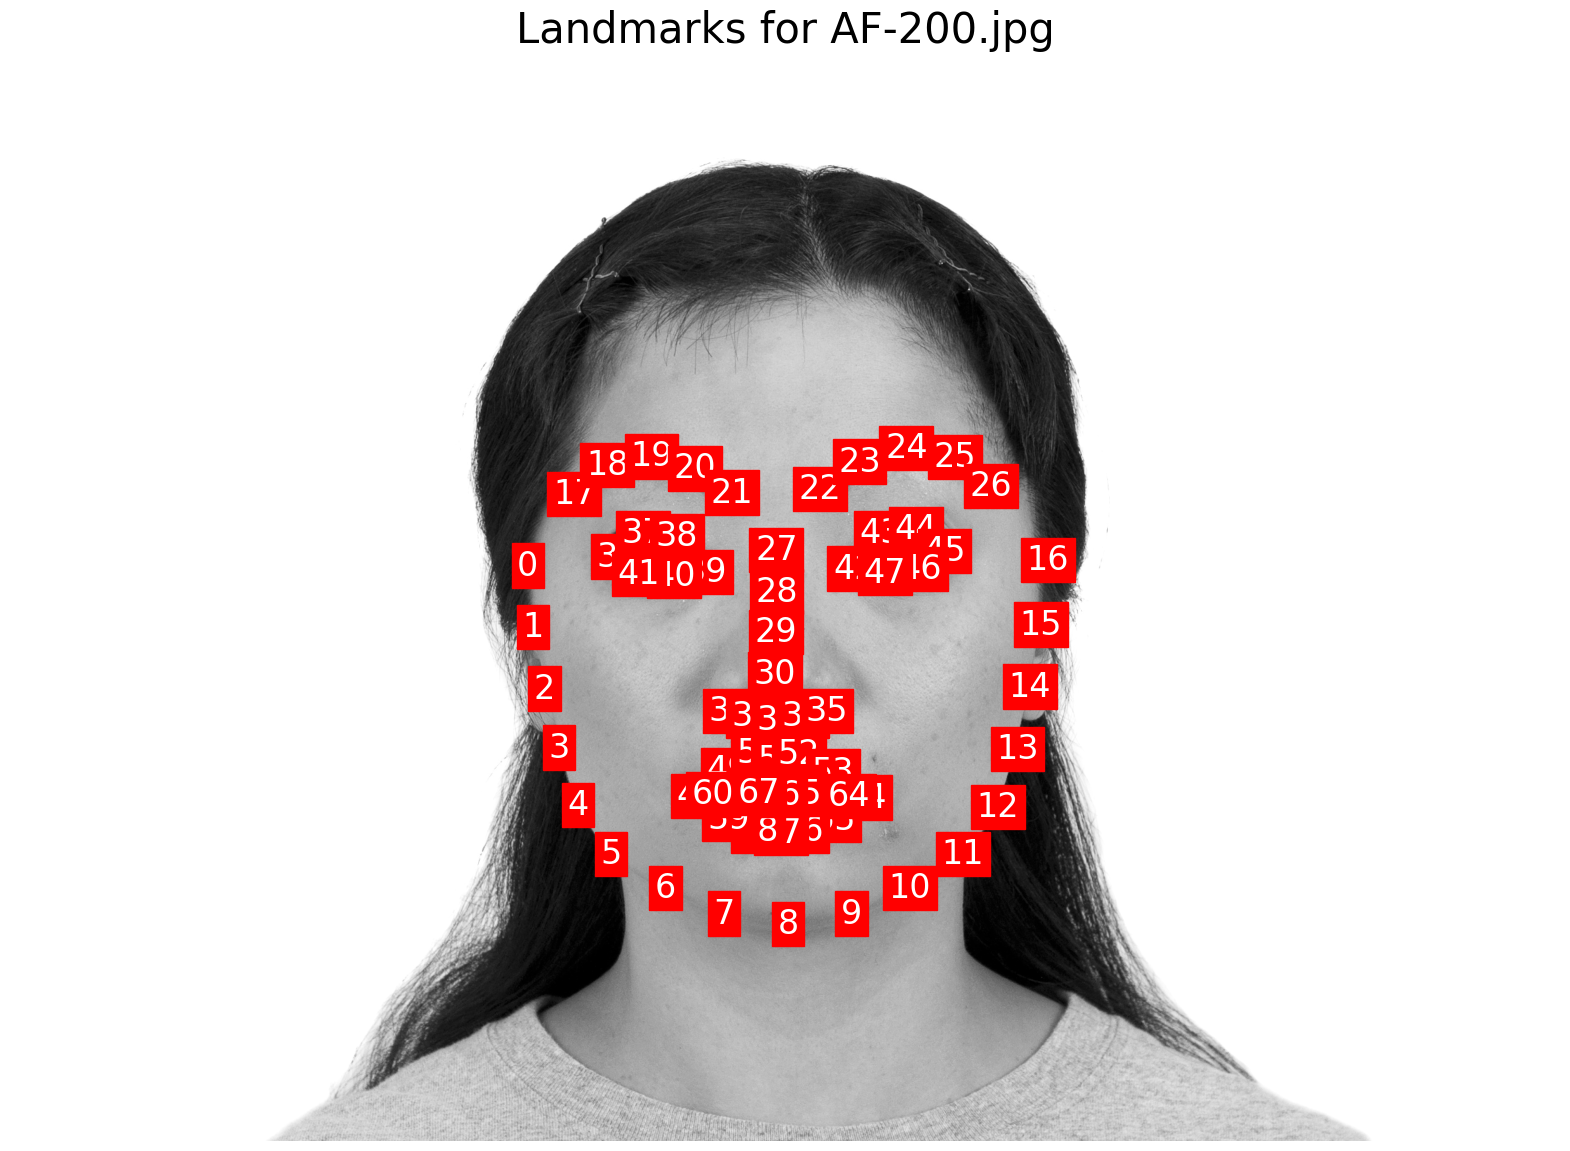

Facial landmarks extracted from: neutral_front/001_03.jpg
Facial Landmarks: ['0:(462, 636)', '1:(472, 696)', '2:(485, 753)', '3:(495, 812)', '4:(511, 868)', '5:(542, 918)', '6:(582, 960)', '7:(629, 992)', '8:(683, 998)', '9:(739, 987)', '10:(788, 954)', '11:(833, 915)', '12:(868, 868)', '13:(885, 812)', '14:(892, 752)', '15:(899, 694)', '16:(905, 633)', '17:(480, 593)', '18:(500, 558)', '19:(538, 545)', '20:(579, 553)', '21:(618, 570)', '22:(706, 565)', '23:(748, 543)', '24:(793, 532)', '25:(838, 543)', '26:(868, 577)', '27:(663, 623)', '28:(663, 662)', '29:(662, 700)', '30:(661, 739)', '31:(627, 773)', '32:(645, 778)', '33:(666, 783)', '34:(687, 776)', '35:(708, 770)', '36:(524, 642)', '37:(547, 625)', '38:(579, 625)', '39:(609, 644)', '40:(579, 653)', '41:(547, 655)', '42:(732, 639)', '43:(760, 619)', '44:(793, 616)', '45:(818, 633)', '46:(795, 647)', '47:(762, 647)', '48:(595, 856)', '49:(623, 841)', '50:(649, 832)', '51:(671, 838)', '52:(694, 831)', '53:(725, 838)', '54:(757, 851)'

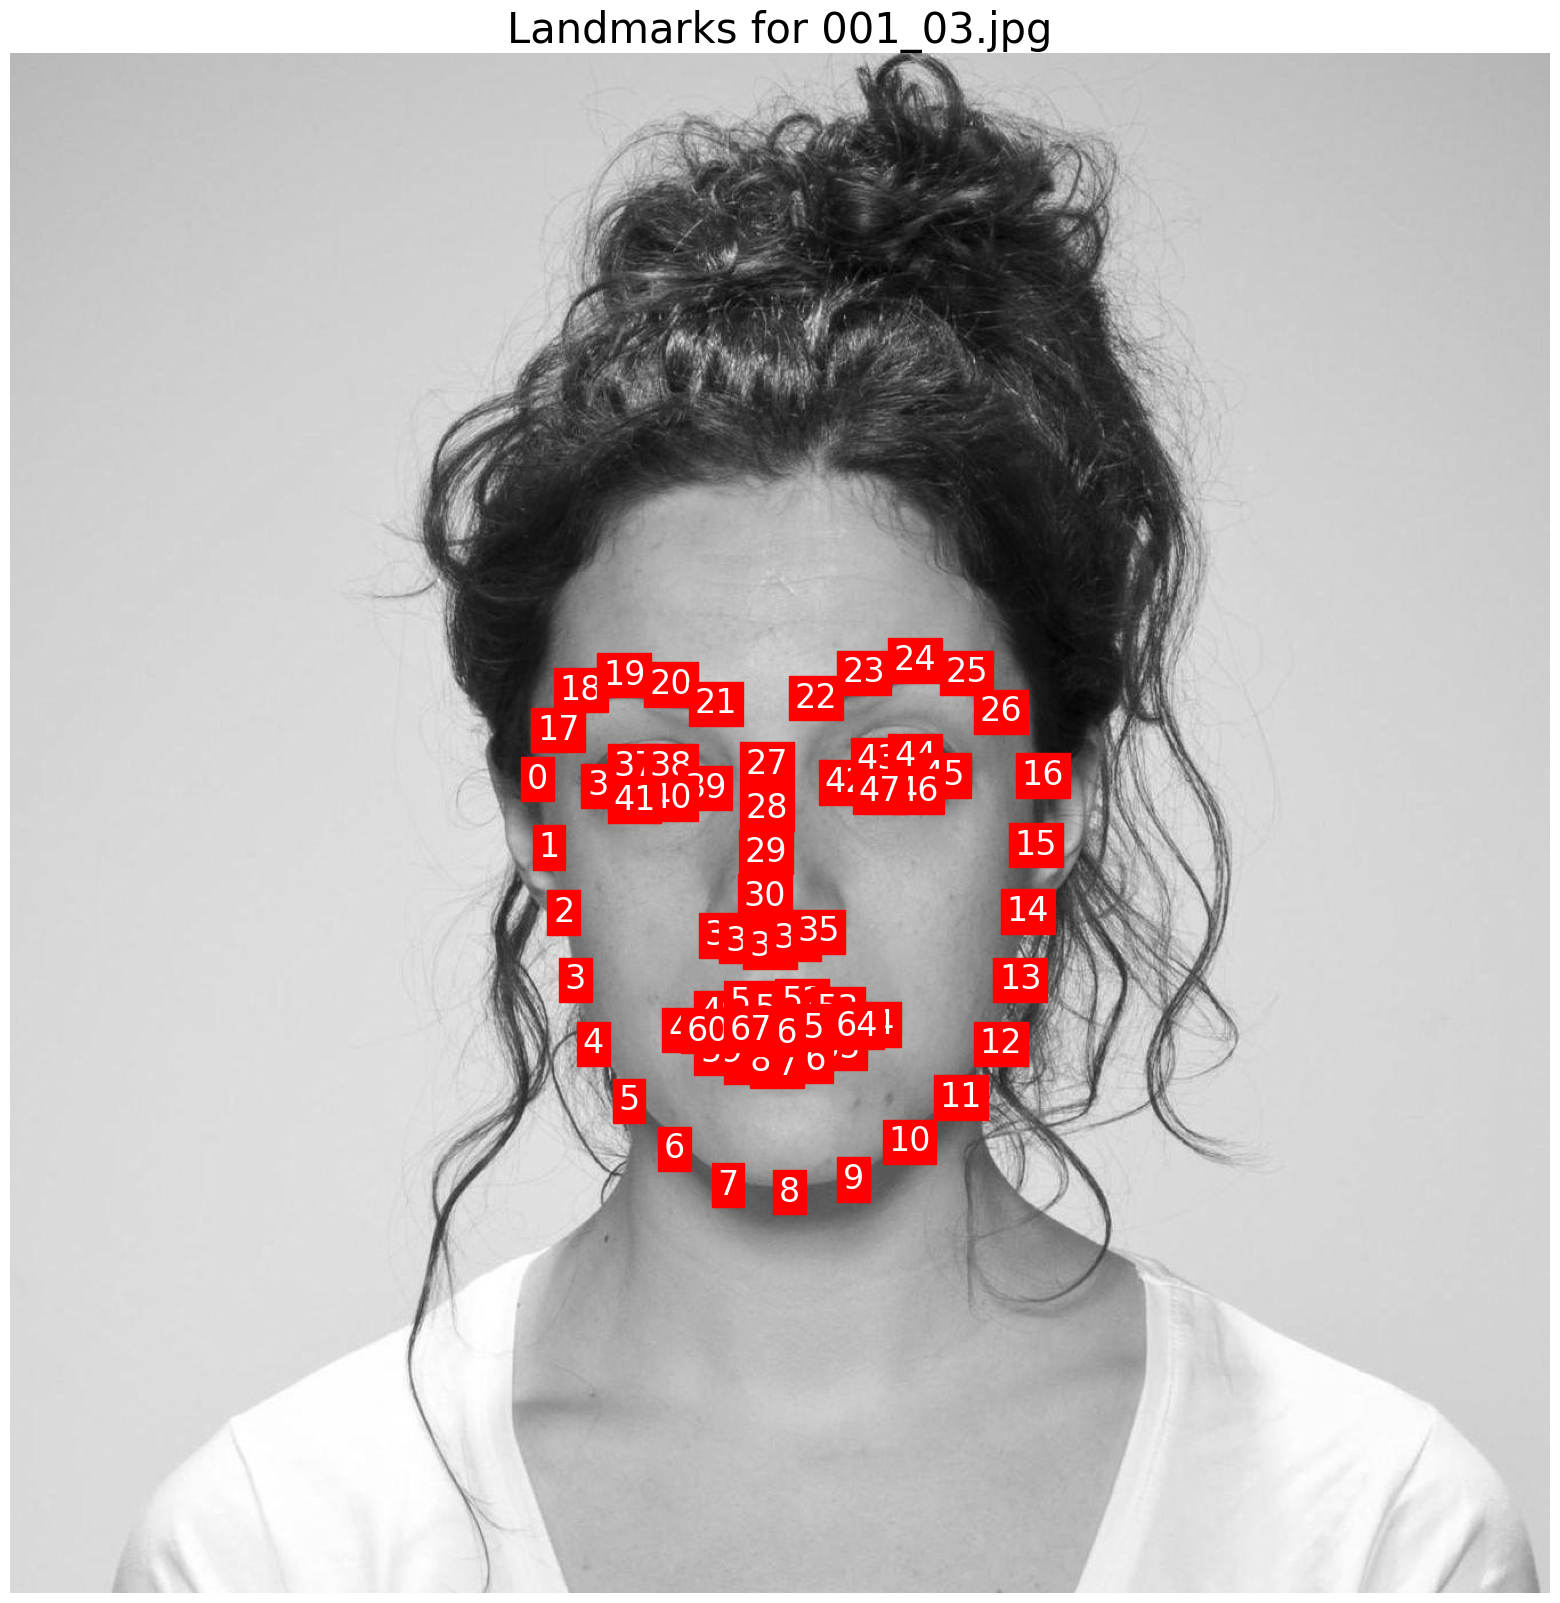

In [2]:
# Purpose: Load and display facial landmarks on the first female face from CFD and the first face from FRLLS datasets.
# Key Steps:
# 1. Load dlib's face detector and shape predictor for landmark extraction.
# 2. Define helper functions to extract landmarks and display images with overlaid, numbered landmarks.
# 3. For each dataset (CFD and FRLLS), find and process the first qualifying image to display landmarks.

# Notes for Collaborators:
# - Ensure `shape_predictor_68_face_landmarks.dat` is available in the same directory; it’s required for dlib’s shape predictor.
# - This code only processes the first female image in CFD and the first image in FRLLS. Adjust loops as needed for more images.

import os
import cv2
import dlib
import numpy as np
import matplotlib.pyplot as plt

# Load dlib's face detector and shape predictor
detector = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor('shape_predictor_68_face_landmarks.dat')

# Define a function to extract facial landmarks from a grayscale image
def get_landmarks(gray_image):
    faces = detector(gray_image)
    if len(faces) > 0:
        landmarks = predictor(gray_image, faces[0])  # Use the first detected face
        coords = [(landmarks.part(n).x, landmarks.part(n).y) for n in range(68)]
        return coords
    return None

# Function to display image with landmarks overlaid and numbered
def display_landmarks(image, landmarks, image_path, scale=1.0):
    formatted_landmarks = [f"{i}:({x}, {y})" for i, (x, y) in enumerate(landmarks)]
    print(f"Facial landmarks extracted from: {image_path}")
    print("Facial Landmarks:", formatted_landmarks)
    print("\n")
    
    plt.figure(figsize=(10 * scale, 10 * scale))
    plt.imshow(image, cmap='gray')

    # Overlay landmarks
    for i, (x, y) in enumerate(landmarks):
        plt.plot(x, y, 'ro', markersize=8 * scale)
        plt.text(x, y, str(i), color='white', fontsize=12 * scale, ha='center', va='center', backgroundcolor='red')

    plt.title(f"Landmarks for {os.path.basename(image_path)}", fontsize=15 * scale)
    plt.axis('off')
    plt.show()

# Paths to folders
cfd_folder = 'CFD_extracted_neutral'
frlls_folder = 'neutral_front'

# Display the first female image from CFD
for file in sorted(os.listdir(cfd_folder)):
    if file.endswith('.jpg') and file[1] == 'F':  # Filter for female images
        image_path = os.path.join(cfd_folder, file)
        image = cv2.imread(image_path)
        gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

        # Extract and display landmarks
        landmarks = get_landmarks(gray_image)
        if landmarks:
            display_landmarks(gray_image, landmarks, image_path, scale=2)
            break  # Display only the first image

# Display the first image from FRLLS
for file in sorted(os.listdir(frlls_folder)):
    if file.endswith('.jpg'):
        image_path = os.path.join(frlls_folder, file)
        image = cv2.imread(image_path)
        gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

        # Extract and display landmarks
        landmarks = get_landmarks(gray_image)
        if landmarks:
            display_landmarks(gray_image, landmarks, image_path, scale=2)
            break  # Display only the first image

In [3]:
# Process images in CFD and FRLLS datasets to extract facial features, storing results in DataFrames

import os
import cv2
import dlib
import numpy as np
import pandas as pd
from tqdm import tqdm

# Load dlib's face detector and shape predictor
detector = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor('shape_predictor_68_face_landmarks.dat')

# Function to calculate Euclidean distance between two points
def euclidean_distance(point1, point2):
    return np.sqrt((point1[0] - point2[0]) ** 2 + (point1[1] - point2[1]) ** 2)

# Function to compute facial features from landmarks
def calculate_features(landmarks):
    if landmarks is None:
        return None

    # Key landmarks
    key_landmarks = {
        'left_temple': np.array(landmarks[0]),
        'right_temple': np.array(landmarks[16]),
        'chin_tip': np.array(landmarks[8]),
        'nose_tip': np.array(landmarks[30]),
        'nose_top': np.array(landmarks[27]),
        'nose_bottom': np.array(landmarks[33]),
        'nose_left': np.array(landmarks[31]),
        'nose_right': np.array(landmarks[35]),
        'left_eye_outer': np.array(landmarks[36]),
        'left_eye_inner': np.array(landmarks[39]),
        'right_eye_outer': np.array(landmarks[45]),
        'right_eye_inner': np.array(landmarks[42]),
        'mouth_left_corner': np.array(landmarks[48]),
        'mouth_right_corner': np.array(landmarks[54]),
        'upper_lip_center': np.array(landmarks[51]),
        'lower_lip_center': np.array(landmarks[57]),
        'glabella': np.array(landmarks[27]),
    }

    # Basic distances
    basic_distances = {
        'face_length': euclidean_distance(key_landmarks['nose_top'], key_landmarks['chin_tip']),
        'face_width': euclidean_distance(key_landmarks['left_temple'], key_landmarks['right_temple']),
        'eye_distance_inner': euclidean_distance(key_landmarks['left_eye_inner'], key_landmarks['right_eye_inner']),
        'eye_distance_outer': euclidean_distance(key_landmarks['left_eye_outer'], key_landmarks['right_eye_outer']),
        'mouth_width': euclidean_distance(key_landmarks['mouth_left_corner'], key_landmarks['mouth_right_corner']),
        'nose_width': euclidean_distance(key_landmarks['nose_left'], key_landmarks['nose_right']),
        'nose_length': euclidean_distance(key_landmarks['nose_top'], key_landmarks['nose_bottom']),
        'lip_height': euclidean_distance(key_landmarks['upper_lip_center'], key_landmarks['lower_lip_center']),
        'left_eye_width': euclidean_distance(key_landmarks['left_eye_outer'], key_landmarks['left_eye_inner']),
        'interocular_distance': euclidean_distance(key_landmarks['left_eye_outer'], key_landmarks['right_eye_outer']),
    }

    # Symmetry-related distances
    symmetry_distances = {
        'left_eye_to_nose_tip': euclidean_distance(key_landmarks['left_eye_inner'], key_landmarks['nose_tip']),
        'right_eye_to_nose_tip': euclidean_distance(key_landmarks['right_eye_inner'], key_landmarks['nose_tip']),
        'left_mouth_to_nose_tip': euclidean_distance(key_landmarks['mouth_left_corner'], key_landmarks['nose_tip']),
        'right_mouth_to_nose_tip': euclidean_distance(key_landmarks['mouth_right_corner'], key_landmarks['nose_tip']),
        'left_nose_to_nose_tip': euclidean_distance(key_landmarks['nose_left'], key_landmarks['nose_tip']),
        'right_nose_to_nose_tip': euclidean_distance(key_landmarks['nose_right'], key_landmarks['nose_tip']),
        'left_eye_to_glabella': euclidean_distance(key_landmarks['left_eye_outer'], key_landmarks['glabella']),
        'right_eye_to_glabella': euclidean_distance(key_landmarks['right_eye_outer'], key_landmarks['glabella']),
    }

    # Feature ratios and proportions used in analysis
    features = {
        'golden_ratio': basic_distances['face_length'] / basic_distances['face_width'] if basic_distances['face_width'] != 0 else np.nan,
        'eye_to_mouth_ratio': basic_distances['eye_distance_inner'] / basic_distances['mouth_width'] if basic_distances['mouth_width'] != 0 else np.nan,
        'eye_spacing_ratio': basic_distances['eye_distance_outer'] / basic_distances['face_width'] if basic_distances['face_width'] != 0 else np.nan,
        'nose_to_face_length_ratio': basic_distances['nose_length'] / basic_distances['face_length'] if basic_distances['face_length'] != 0 else np.nan,
        'mouth_to_nose_ratio': basic_distances['mouth_width'] / basic_distances['nose_width'] if basic_distances['nose_width'] != 0 else np.nan,
        'lip_height_to_mouth_ratio': basic_distances['lip_height'] / basic_distances['mouth_width'] if basic_distances['mouth_width'] != 0 else np.nan,
        
        # Symmetry ratios using precomputed distances
        'eye_symmetry_ratio': abs(symmetry_distances['left_eye_to_nose_tip'] / symmetry_distances['right_eye_to_nose_tip'] - 1) if symmetry_distances['right_eye_to_nose_tip'] != 0 else np.nan,
        'mouth_symmetry_ratio': abs(symmetry_distances['left_mouth_to_nose_tip'] / symmetry_distances['right_mouth_to_nose_tip'] - 1) if symmetry_distances['right_mouth_to_nose_tip'] != 0 else np.nan,
        'nose_symmetry_ratio': abs(symmetry_distances['left_nose_to_nose_tip'] / symmetry_distances['right_nose_to_nose_tip'] - 1) if symmetry_distances['right_nose_to_nose_tip'] != 0 else np.nan,
        
        'eye_positioning_ratio': basic_distances['left_eye_width'] / basic_distances['eye_distance_inner'] if basic_distances['eye_distance_inner'] != 0 else np.nan,
        'nose_dimensions_ratio': basic_distances['nose_length'] / basic_distances['nose_width'] if basic_distances['nose_width'] != 0 else np.nan,
        'mouth_to_face_width_ratio': basic_distances['mouth_width'] / basic_distances['face_width'] if basic_distances['face_width'] != 0 else np.nan,
    }
    
    return features

# Function to extract landmarks
def get_landmarks(gray_image):
    faces = detector(gray_image)
    if len(faces) > 0:
        landmarks = predictor(gray_image, faces[0])  # Use the first detected face
        coords = [(landmarks.part(n).x, landmarks.part(n).y) for n in range(68)]
        return coords
    return None

# Function to process images in a directory, calculate features, and store them in a DataFrame
def process_images(image_folder, filtered_files):
    features_list = []
    for file in tqdm(filtered_files, desc=f"Processing images in {image_folder}"):
        image_path = os.path.join(image_folder, file)
        image = cv2.imread(image_path)
        gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        
        # Extract landmarks
        landmarks = get_landmarks(gray_image)
        if landmarks is None:
            continue  # Skip images with no landmarks
        
        # Calculate features
        features = calculate_features(landmarks)
        if features:
            features['image_path'] = image_path
            features_list.append(features)

    # Convert the list of dictionaries to a DataFrame
    features_df = pd.DataFrame(features_list)
    return features_df

# Paths to folders
cfd_folder = 'CFD_extracted_neutral'
frlls_folder = 'neutral_front'

# Process CFD images
cfd_files = sorted([file for file in os.listdir(cfd_folder) if file.endswith('.jpg')])
cfd_features_df = process_images(cfd_folder, cfd_files)

# Process FRLLS images
frlls_files = sorted([file for file in os.listdir(frlls_folder) if file.endswith('.jpg')])
frlls_features_df = process_images(frlls_folder, frlls_files)

# Display the feature dataframes for both datasets
print("CFD Features DataFrame:")
display(cfd_features_df.head())

print("\nFRLLS Features DataFrame:")
display(frlls_features_df.head())


Processing images in CFD_extracted_neutral: 100%|█| 827/827 [03:26<00:00,  4.01i
Processing images in neutral_front: 100%|█████| 102/102 [00:13<00:00,  7.65it/s]

CFD Features DataFrame:


golden_ratio  eye_to_mouth_ratio  eye_spacing_ratio  \
0      0.718585            0.886541           0.628107   
1      0.743150            0.878087           0.593290   
2      0.826459            0.587203           0.610441   
3      0.772364            0.864881           0.598545   
4      0.755989            0.777829           0.642133   

   nose_to_face_length_ratio  mouth_to_nose_ratio  lip_height_to_mouth_ratio  \
0                   0.453112             1.736892                   0.435857   
1                   0.454899             1.617814                   0.386326   
2                   0.439068             1.618384                   0.370028   
3                   0.429543             1.505916                   0.442563   
4                   0.428896             1.929712                   0.332226   

   eye_symmetry_ratio  mouth_symmetry_ratio  nose_symmetry_ratio  \
0            0.064355              0.053467             0.079755   
1            0.053256              0.005674             0.002491   
2            0.025624              0.031024             0.007715   
3            0.023564              0.007549             0.028867   
4            0.013052              0.016469             0.001869   

   eye_positioning_ratio  nose_dimensions_ratio  mouth_to_face_width_ratio  \
0               0.602669               1.756628                   0.321941   
1               0.589058               1.752958                   0.311996   
2               0.817791               1.479778                   0.396861   
3               0.668781               1.672888                   0.298650   
4               0.628728               1.713125                   0.365234   

                         image_path  
0  CFD_extracted_neutral/AF-200.jpg  
1  CFD_extracted_neutral/AF-201.jpg  
2  CFD_extracted_neutral/AF-202.jpg  
3  CFD_extracted_neutral/AF-203.jpg  
4  CFD_extracted_neutral/AF-204.jpg


FRLLS Features DataFrame:


golden_ratio  eye_to_mouth_ratio  eye_spacing_ratio  \
0      0.847685            0.759525           0.663953   
1      0.839259            0.757035           0.652516   
2      0.874990            0.666680           0.643171   
3      0.868692            0.681122           0.588949   
4      0.815803            0.867318           0.605770   

   nose_to_face_length_ratio  mouth_to_nose_ratio  lip_height_to_mouth_ratio  \
0                   0.426136             1.999581                   0.302388   
1                   0.425986             2.269189                   0.372858   
2                   0.425969             2.175036                   0.281663   
3                   0.425086             1.837356                   0.265393   
4                   0.426652             1.667990                   0.325376   

   eye_symmetry_ratio  mouth_symmetry_ratio  nose_symmetry_ratio  \
0            0.116936              0.089355             0.145987   
1            0.091259              0.038090             0.114192   
2            0.037095              0.046309             0.035316   
3            0.080022              0.047228             0.124532   
4            0.011196              0.028955             0.001550   

   eye_positioning_ratio  nose_dimensions_ratio  mouth_to_face_width_ratio  \
0               0.690678               1.974302                   0.365854   
1               0.716748               2.282764                   0.355386   
2               0.715698               2.050038                   0.395445   
3               0.799563               2.024880                   0.335071   
4               0.561168               1.754900                   0.330827   

                 image_path  
0  neutral_front/001_03.jpg  
1  neutral_front/002_03.jpg  
2  neutral_front/003_03.jpg  
3  neutral_front/004_03.jpg  
4  neutral_front/005_03.jpg

In [4]:
# Load and clean sex data from London and CFD datasets
# Ensure proper formatting of identifiers (e.g., zero-padding face_id and stripping whitespace from Model)

# Load sex data from the provided files
london_info_df = pd.read_csv('london_faces_info.csv')
london_info_df['face_id'] = london_info_df['face_id'].astype(str).str.zfill(3)  # Pad face_id with leading zeros

cfd_info_df = pd.read_excel('CFD_dataset.xlsx', sheet_name='ALL_DATA')
cfd_info_df['Model'] = cfd_info_df['Model'].str.strip()  # Ensure Model column is clean of whitespace

# Copy the original feature DataFrames to avoid column duplication on re-run
frlls_features_with_sex_df = frlls_features_df.copy()
cfd_features_with_sex_df = cfd_features_df.copy()

# Merge sex information with FRLLS features DataFrame
frlls_features_with_sex_df['face_id'] = frlls_features_with_sex_df['image_path'].apply(lambda x: x.split('/')[-1].split('_')[0])
frlls_features_with_sex_df = frlls_features_with_sex_df.merge(
    london_info_df[['face_id', 'face_gender']], on='face_id', how='left'
).rename(columns={'face_gender': 'sex'})

# Add binary sex column: 0 for female, 1 for male in frlls_features_with_sex_df
frlls_features_with_sex_df['SexBinary'] = frlls_features_with_sex_df['sex'].apply(
    lambda x: 0 if isinstance(x, str) and x.lower() == 'female' else 1 if isinstance(x, str) and x.lower() == 'male' else None
)

# Merge sex information with CFD features DataFrame
cfd_features_with_sex_df['Model'] = cfd_features_with_sex_df['image_path'].apply(lambda x: x.split('/')[-1].split('.')[0])
cfd_features_with_sex_df = cfd_features_with_sex_df.merge(
    cfd_info_df[['Model', 'GenderSelf']], on='Model', how='left'
).rename(columns={'GenderSelf': 'sex'})

# Add binary sex column: 0 for female, 1 for male in cfd_features_with_sex_df
cfd_features_with_sex_df['SexBinary'] = cfd_features_with_sex_df['sex'].apply(
    lambda x: 0 if x == 'F' else 1 if x == 'M' else None
)

# Display the final DataFrames with merged sex information
print("FRLLS Features DataFrame with sex and SexBinary:")
display(frlls_features_with_sex_df.tail())

print("\nCFD Features DataFrame with sex and SexBinary:")
display(cfd_features_with_sex_df.tail())


FRLLS Features DataFrame with sex and SexBinary:


golden_ratio  eye_to_mouth_ratio  eye_spacing_ratio  \
97       0.859240            0.642981           0.597558   
98       0.900444            0.728139           0.598424   
99       0.811408            0.698655           0.626966   
100      0.756753            0.723670           0.585064   
101      0.862162            0.685225           0.618413   

     nose_to_face_length_ratio  mouth_to_nose_ratio  \
97                    0.415676             2.141467   
98                    0.412066             1.812638   
99                    0.453876             1.999239   
100                   0.390597             2.144519   
101                   0.395323             2.238546   

     lip_height_to_mouth_ratio  eye_symmetry_ratio  mouth_symmetry_ratio  \
97                    0.351644            0.022677              0.016309   
98                    0.305032            0.160430              0.061890   
99                    0.320949            0.005325              0.007113   
100                   0.159519            0.011841              0.022846   
101                   0.320843            0.044875              0.003756   

     nose_symmetry_ratio  eye_positioning_ratio  nose_dimensions_ratio  \
97              0.016905               0.684016               1.942068   
98              0.181871               0.678187               1.929201   
99              0.013762               0.750981               2.041018   
100             0.068393               0.694897               1.854006   
101             0.022797               0.761491               2.125051   

     mouth_to_face_width_ratio                image_path face_id     sex  \
97                    0.393837  neutral_front/142_03.jpg     142    male   
98                    0.348624  neutral_front/143_03.jpg     143    male   
99                    0.360740  neutral_front/144_03.jpg     144  female   
100                   0.341902  neutral_front/172_03.jpg     172    male   
101                   0.359035  neutral_front/173_03.jpg     173    male   

     SexBinary  
97           1  
98           1  
99           0  
100          1  
101          1


CFD Features DataFrame with sex and SexBinary:


golden_ratio  eye_to_mouth_ratio  eye_spacing_ratio  \
822      0.807038            0.713976           0.627260   
823      0.866989            0.643313           0.595139   
824      0.812205            0.830136           0.609109   
825      0.818860            0.621637           0.593288   
826      0.794181            0.662965           0.553844   

     nose_to_face_length_ratio  mouth_to_nose_ratio  \
822                   0.393264             2.001012   
823                   0.423613             1.906167   
824                   0.390131             1.806604   
825                   0.410983             2.118882   
826                   0.433958             1.907179   

     lip_height_to_mouth_ratio  eye_symmetry_ratio  mouth_symmetry_ratio  \
822                   0.234003            0.020029              0.003710   
823                   0.170317            0.038176              0.017268   
824                   0.311940            0.060368              0.042901   
825                   0.259348            0.045650              0.030948   
826                   0.253808            0.065304              0.072620   

     nose_symmetry_ratio  eye_positioning_ratio  nose_dimensions_ratio  \
822             0.006513               0.659171               1.675604   
823             0.007080               0.758523               1.882858   
824             0.072760               0.671092               1.813532   
825             0.052720               0.744795               1.847251   
826             0.132778               0.696576               1.877810   

     mouth_to_face_width_ratio                        image_path   Model sex  \
822                   0.379015  CFD_extracted_neutral/WM-254.jpg  WM-254   M   
823                   0.371815  CFD_extracted_neutral/WM-255.jpg  WM-255   M   
824                   0.315656  CFD_extracted_neutral/WM-256.jpg  WM-256   M   
825                   0.386024  CFD_extracted_neutral/WM-257.jpg  WM-257   M   
826                   0.350031  CFD_extracted_neutral/WM-258.jpg  WM-258   M   

     SexBinary  
822          1  
823          1  
824          1  
825          1  
826          1

In [5]:
# Calculate and display the number of female and male subjects in both CFD and FRLLS datasets
# SexBinary: 0 = female, 1 = male
# Summarizes sex distribution for reference and validation of data completeness

# Print the number of female and male subjects in CFD dataset
cfd_female_count = (cfd_features_with_sex_df['SexBinary'] == 0).sum()
cfd_male_count = (cfd_features_with_sex_df['SexBinary'] == 1).sum()

print("CFD Dataset:")
print(f"Number of female subjects: {cfd_female_count}")
print(f"Number of male subjects: {cfd_male_count}")

# Print the number of female and male subjects in FRLLS dataset
frlls_female_count = (frlls_features_with_sex_df['SexBinary'] == 0).sum()
frlls_male_count = (frlls_features_with_sex_df['SexBinary'] == 1).sum()

print("\nFRLLS Dataset:")
print(f"Number of female subjects: {frlls_female_count}")
print(f"Number of male subjects: {frlls_male_count}")

CFD Dataset:
Number of female subjects: 421
Number of male subjects: 406

FRLLS Dataset:
Number of female subjects: 49
Number of male subjects: 53


Descriptive Statistics for CFD Dataset:


golden_ratio  eye_to_mouth_ratio  eye_spacing_ratio  \
count      827.0000            827.0000           827.0000   
mean         0.8097              0.7033             0.6194   
std          0.0467              0.0584             0.0288   
min          0.6795              0.5421             0.5380   
25%          0.7760              0.6620             0.5994   
50%          0.8083              0.7006             0.6178   
75%          0.8398              0.7400             0.6382   
max          0.9844              0.9120             0.7113   

       nose_to_face_length_ratio  mouth_to_nose_ratio  \
count                   827.0000             827.0000   
mean                      0.4252               1.8315   
std                       0.0241               0.1323   
min                       0.3514               1.4950   
25%                       0.4089               1.7418   
50%                       0.4248               1.8272   
75%                       0.4412               1.9170   
max                       0.5018               2.3533   

       lip_height_to_mouth_ratio  eye_symmetry_ratio  mouth_symmetry_ratio  \
count                   827.0000            827.0000              827.0000   
mean                      0.3269              0.0367                0.0334   
std                       0.0637              0.0301                0.0276   
min                       0.1450              0.0000                0.0000   
25%                       0.2857              0.0142                0.0124   
50%                       0.3284              0.0296                0.0278   
75%                       0.3701              0.0520                0.0483   
max                       0.5069              0.2142                0.1813   

       nose_symmetry_ratio  eye_positioning_ratio  nose_dimensions_ratio  \
count             827.0000               827.0000               827.0000   
mean                0.0544                 0.6972                 1.7020   
std                 0.0456                 0.0597                 0.1840   
min                 0.0000                 0.5318                 1.1237   
25%                 0.0200                 0.6555                 1.5708   
50%                 0.0440                 0.6963                 1.7057   
75%                 0.0770                 0.7364                 1.8287   
max                 0.2504                 0.8735                 2.2428   

       mouth_to_face_width_ratio  
count                   827.0000  
mean                      0.3718  
std                       0.0312  
min                       0.2850  
25%                       0.3500  
50%                       0.3691  
75%                       0.3923  
max                       0.4612


Descriptive Statistics for FRLLS Dataset:


golden_ratio  eye_to_mouth_ratio  eye_spacing_ratio  \
count      102.0000            102.0000           102.0000   
mean         0.8322              0.7351             0.6138   
std          0.0454              0.0568             0.0287   
min          0.7191              0.6428             0.5367   
25%          0.8008              0.6901             0.5941   
50%          0.8381              0.7280             0.6178   
75%          0.8619              0.7748             0.6334   
max          0.9565              0.8874             0.6797   

       nose_to_face_length_ratio  mouth_to_nose_ratio  \
count                   102.0000             102.0000   
mean                      0.4089               1.9710   
std                       0.0305               0.1927   
min                       0.3456               1.5000   
25%                       0.3888               1.8381   
50%                       0.4063               1.9807   
75%                       0.4271               2.1038   
max                       0.5000               2.4639   

       lip_height_to_mouth_ratio  eye_symmetry_ratio  mouth_symmetry_ratio  \
count                   102.0000            102.0000              102.0000   
mean                      0.3210              0.0553                0.0361   
std                       0.0703              0.0411                0.0330   
min                       0.0723              0.0017                0.0002   
25%                       0.2804              0.0205                0.0125   
50%                       0.3139              0.0481                0.0251   
75%                       0.3642              0.0802                0.0470   
max                       0.4970              0.2139                0.1593   

       nose_symmetry_ratio  eye_positioning_ratio  nose_dimensions_ratio  \
count             102.0000               102.0000               102.0000   
mean                0.0676                 0.6949                 1.9066   
std                 0.0552                 0.0575                 0.2229   
min                 0.0009                 0.5612                 1.3709   
25%                 0.0230                 0.6582                 1.7747   
50%                 0.0559                 0.6961                 1.9169   
75%                 0.1003                 0.7340                 2.0532   
max                 0.2226                 0.8582                 2.3038   

       mouth_to_face_width_ratio  
count                   102.0000  
mean                      0.3520  
std                       0.0265  
min                       0.2847  
25%                       0.3327  
50%                       0.3479  
75%                       0.3688  
max                       0.4145

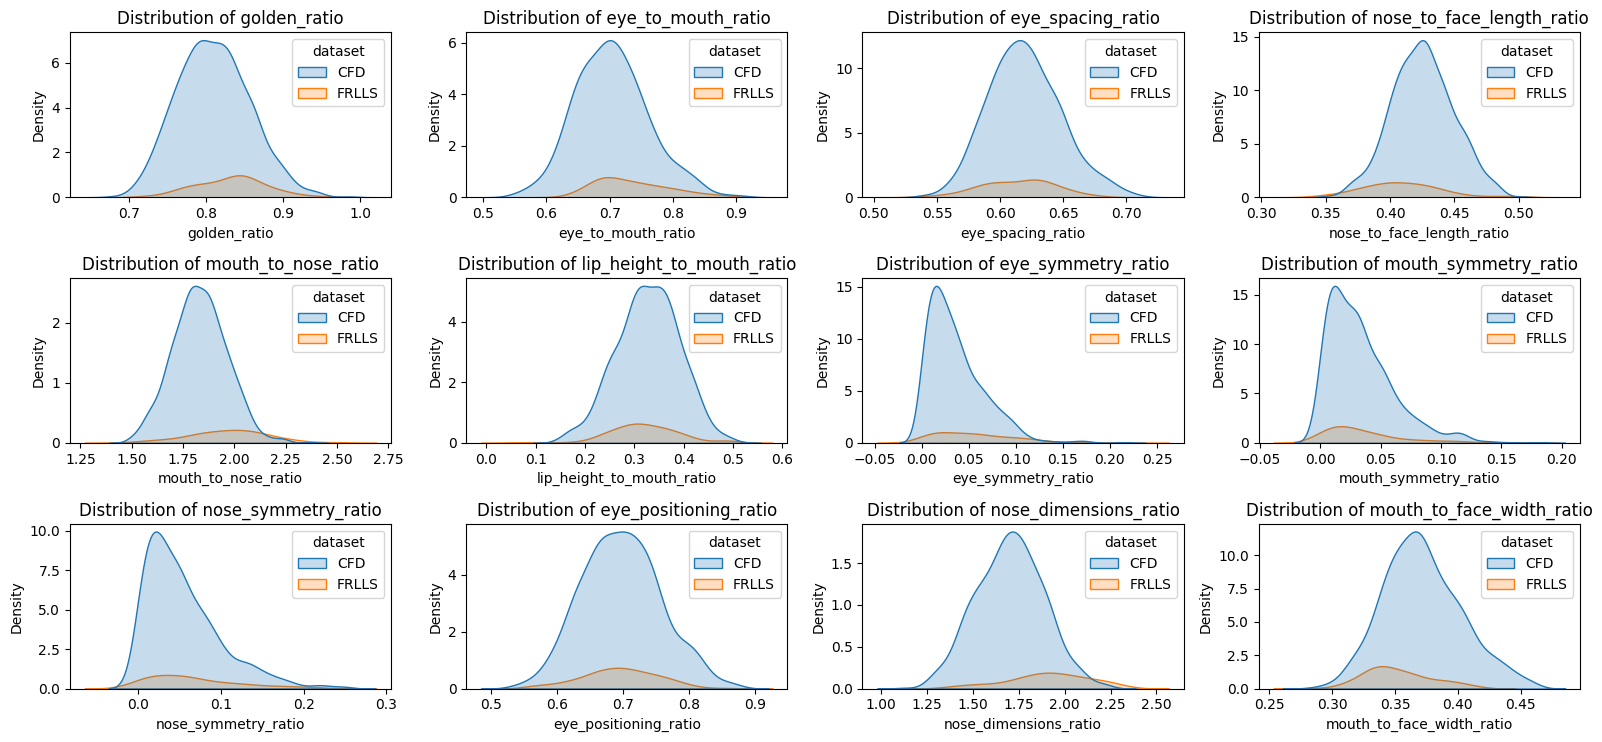

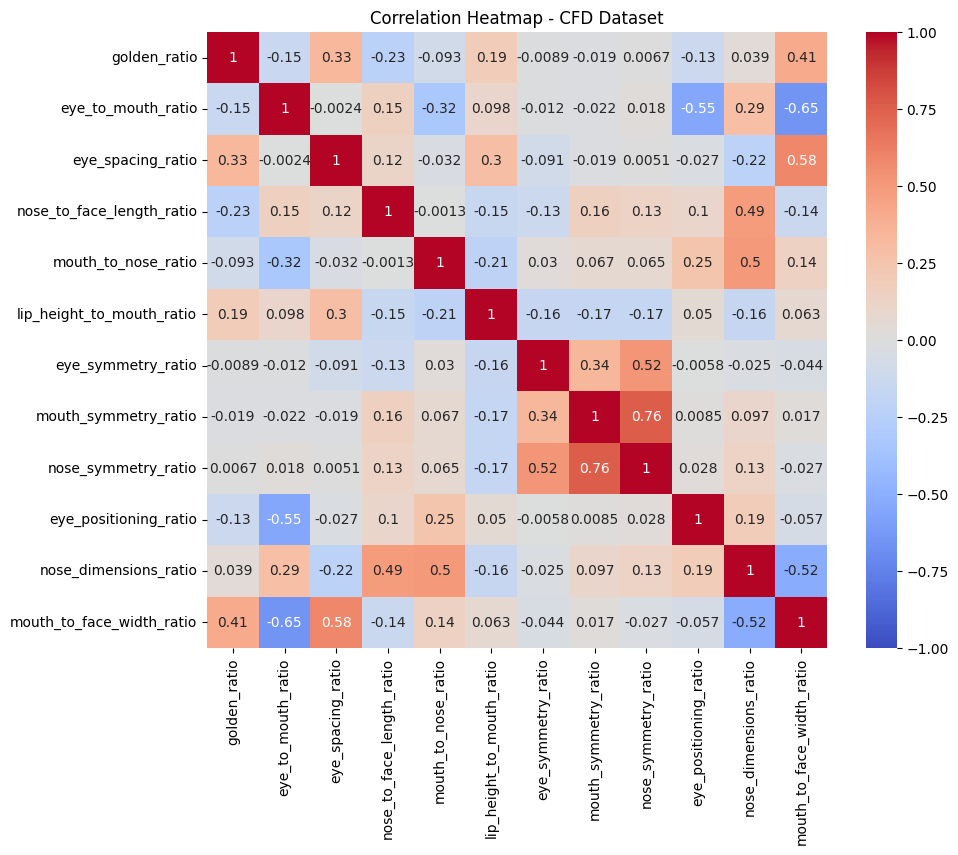

Variance Inflation Factor (VIF):
                       Feature           VIF
0                golden_ratio   5554.143306
1          eye_to_mouth_ratio   2354.061622
2           eye_spacing_ratio   3545.490508
3   nose_to_face_length_ratio   5452.834862
4         mouth_to_nose_ratio   5440.554033
5   lip_height_to_mouth_ratio     36.276306
6          eye_symmetry_ratio      3.689087
7        mouth_symmetry_ratio      6.038790
8         nose_symmetry_ratio      7.250868
9       eye_positioning_ratio    873.856072
10      nose_dimensions_ratio   5621.361049
11  mouth_to_face_width_ratio  14246.176583
No pairs with correlation above 0.8 detected.


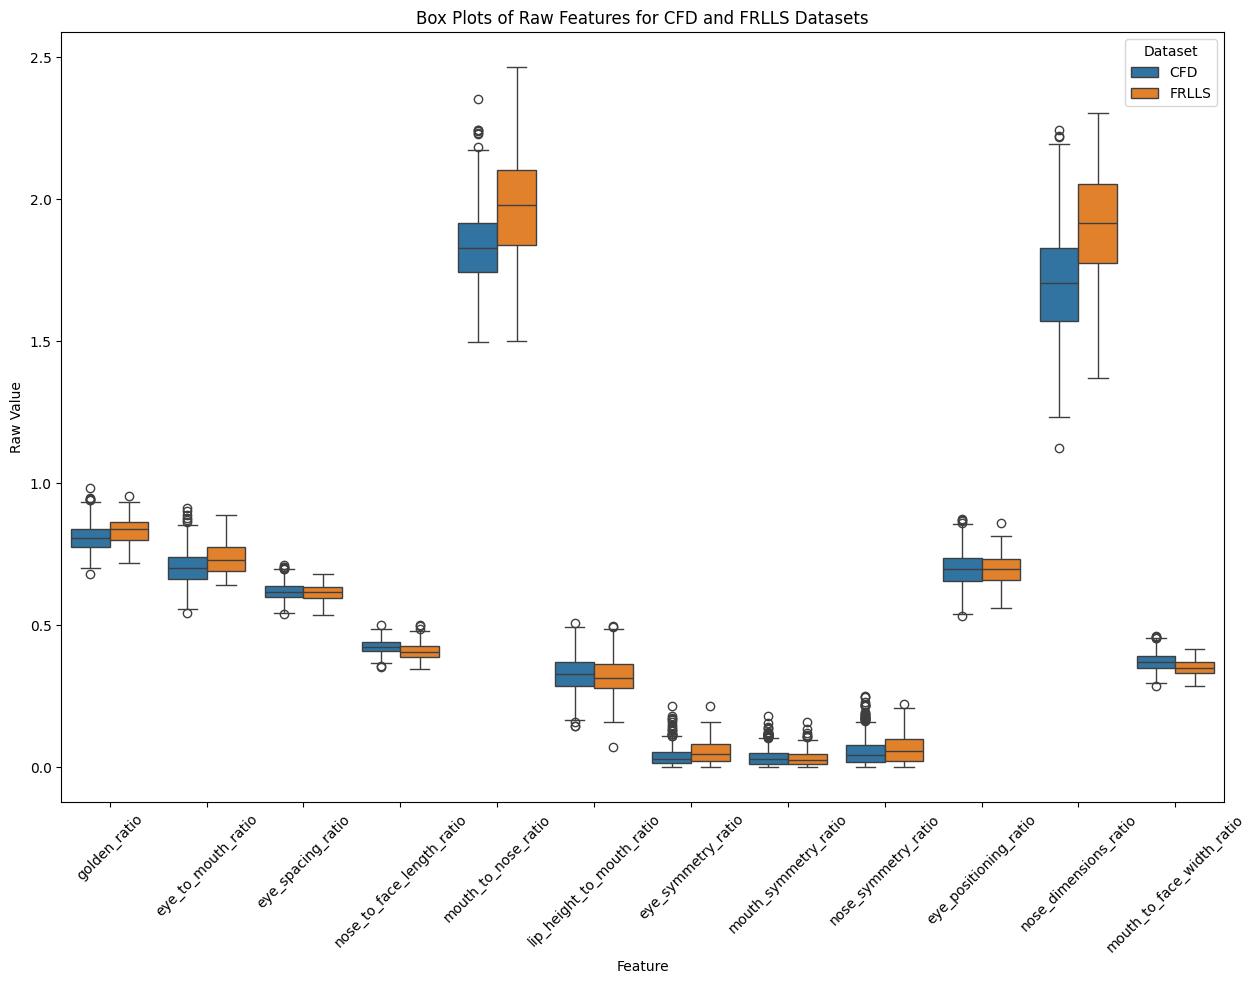

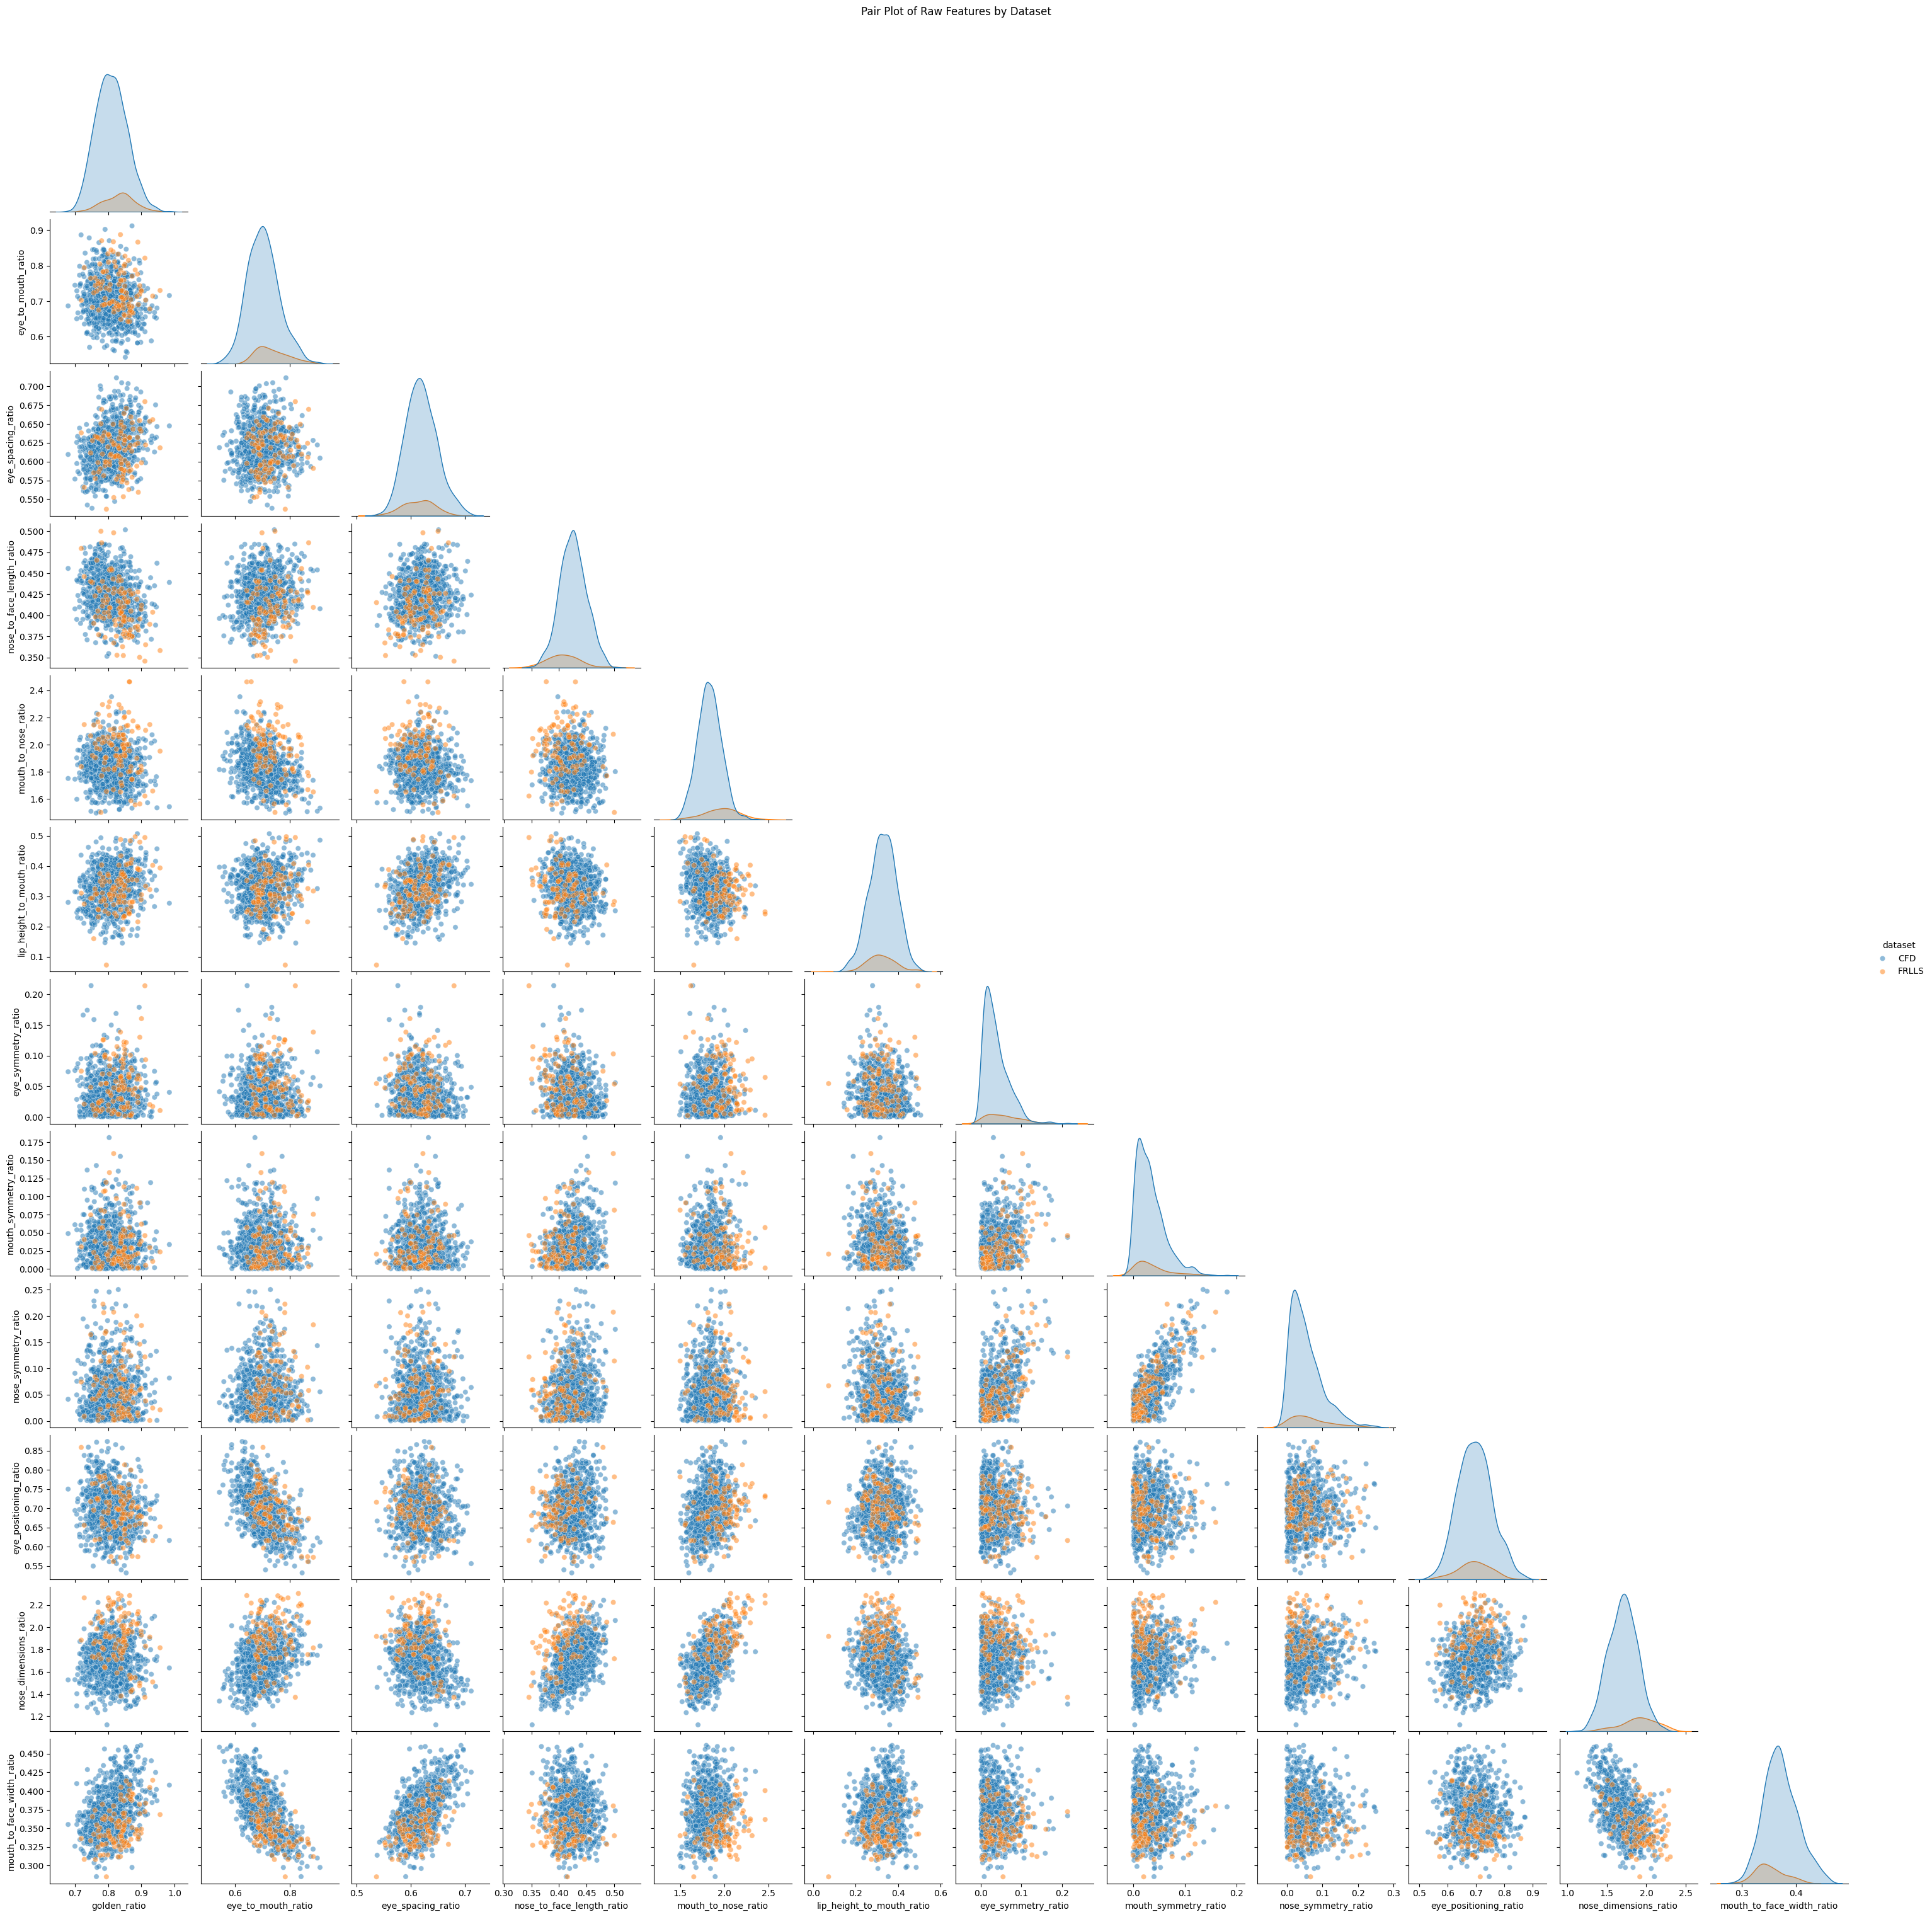

In [6]:
# EXPLORATORY DATA ANALYSIS OF RAW FEATURE MEASUREMENTS

# Step 1: Load the Raw Feature Set
# Load the CFD and FRLLS datasets and drop non-feature columns (e.g., identifiers).

# Step 2: Descriptive Statistics for Each Dataset
# Display descriptive statistics (mean, std, min, max, quartiles) for each feature
# in the CFD and FRLLS datasets, providing an overview of feature distributions.

# Step 3: Feature Distributions by Dataset
# Plot kernel density estimates (KDE) for each feature, comparing distributions across CFD and FRLLS datasets.

# Step 4: Pairwise Correlation Heatmap for CFD Dataset
# Display a correlation heatmap for the CFD dataset, highlighting relationships between features.

# Step 5: Multi-Collinearity Check with Variance Inflation Factor (VIF)
# Calculate and display the VIF for each feature in the CFD dataset, identifying potential collinearity issues.

# Step 6: Feature Pair Scatter Plots for Highly Correlated Pairs
# Identify highly correlated feature pairs (correlation > 0.8) in the CFD dataset and
# generate scatter plots to visualize the relationships between these pairs.

# Step 7: Box Plots for Each Feature by Dataset
# Generate box plots for each feature in the CFD and FRLLS datasets to visualize their range, median, and outliers.

# Step 8: Pair Plot for Each Feature (Color by Dataset)
# Create a pair plot (scatter plot matrix) for all features, colored by dataset, to observe relationships and distributions.

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Step 1: Load the Raw Feature Set
# Assuming cfd_features_with_sex_df and frlls_features_with_sex_df are the raw DataFrames with untransformed features

# Drop non-feature columns (e.g., identifiers)
cfd_features = cfd_features_with_sex_df.drop(columns=['sex', 'SexBinary', 'image_path', 'Model'])
frlls_features = frlls_features_with_sex_df.drop(columns=['sex', 'SexBinary', 'image_path', 'face_id'])

# Add a column to indicate the dataset origin
cfd_features['dataset'] = 'CFD'
frlls_features['dataset'] = 'FRLLS'

# Combine raw datasets for analysis
combined_df = pd.concat([cfd_features, frlls_features], ignore_index=True)

# Step 2: Descriptive Statistics for Each Dataset
pd.options.display.float_format = '{:.4f}'.format  # Suppress scientific notation for readability

print("Descriptive Statistics for CFD Dataset:")
display(cfd_features.describe())

print("\nDescriptive Statistics for FRLLS Dataset:")
display(frlls_features.describe())

pd.reset_option('display.float_format')  # Reset display options

# Step 3: Feature Distributions by Dataset
plt.figure(figsize=(16, 12))
for i, feature in enumerate(combined_df.columns[:-1], 1):  # Exclude 'dataset' column
    plt.subplot(5, 4, i)
    sns.kdeplot(data=combined_df, x=feature, hue='dataset', fill=True)
    plt.title(f"Distribution of {feature}")
plt.tight_layout()
plt.show()

# Step 4: Pairwise Correlation Heatmap for CFD Dataset
plt.figure(figsize=(10, 8))
sns.heatmap(cfd_features.drop(columns=['dataset']).corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Correlation Heatmap - CFD Dataset")
plt.show()

# Step 5: Multi-Collinearity Check with Variance Inflation Factor (VIF)
vif_data = pd.DataFrame()
vif_data["Feature"] = cfd_features.columns[:-1]  # Exclude 'dataset' column
vif_data["VIF"] = [variance_inflation_factor(cfd_features.iloc[:, :-1].values, i) 
                   for i in range(cfd_features.shape[1] - 1)]
print("Variance Inflation Factor (VIF):\n", vif_data)

# Step 6: Feature Pair Scatter Plots for Highly Correlated Pairs
# Identify highly correlated pairs (correlation > 0.8) in the CFD dataset
high_corr_pairs = [(f1, f2) for f1 in cfd_features.columns[:-1] for f2 in cfd_features.columns[:-1] 
                   if f1 != f2 and abs(cfd_features.drop(columns=['dataset']).corr().loc[f1, f2]) > 0.8]
if high_corr_pairs:
    print("\nHighly correlated feature pairs:\n", high_corr_pairs)
    plt.figure(figsize=(16, 12))
    for i, (f1, f2) in enumerate(high_corr_pairs[:10], 1):  # Display up to 10 pairs
        plt.subplot(5, 2, i)
        sns.scatterplot(data=combined_df, x=f1, y=f2, hue='dataset')
        plt.title(f"{f1} vs {f2}")
    plt.tight_layout()
    plt.show()
else:
    print("No pairs with correlation above 0.8 detected.")

# Step 7: Box Plots for Each Feature by Dataset
plt.figure(figsize=(15, 10))
sns.boxplot(data=combined_df.melt(id_vars='dataset'), x='variable', y='value', hue='dataset')
plt.xticks(rotation=45)
plt.title("Box Plots of Raw Features for CFD and FRLLS Datasets")
plt.ylabel("Raw Value")
plt.xlabel("Feature")
plt.legend(title='Dataset')
plt.show()

# Step 8: Pair Plot for Each Feature (Color by Dataset)
sns.pairplot(combined_df, hue='dataset', plot_kws={'alpha': 0.5}, corner=True)
plt.suptitle("Pair Plot of Raw Features by Dataset", y=1.02)
plt.show()


In [8]:
# This cell applies data transformations separately for training, validation, and test sets to prevent data leakage.

from sklearn.preprocessing import PowerTransformer, MinMaxScaler
from sklearn.model_selection import train_test_split
import pandas as pd

# Step 1: Identify feature columns dynamically (exclude identifiers and target)
features = cfd_features_with_sex_df.columns.difference(['sex', 'SexBinary', 'image_path', 'Model']).tolist()

# Step 2: Split CFD dataset into training and validation sets
X_cfd = cfd_features_with_sex_df[features]
y_cfd = cfd_features_with_sex_df['SexBinary']
X_train, X_val, y_train, y_val = train_test_split(X_cfd, y_cfd, test_size=0.2, random_state=42, stratify=y_cfd)

# Step 3: Apply transformations separately for each dataset
# Training Set
pt_train = PowerTransformer()
scaler_train = MinMaxScaler()

X_train_transformed = pt_train.fit_transform(X_train)
X_train_normalized = scaler_train.fit_transform(X_train_transformed)

X_train_normalized = pd.DataFrame(X_train_normalized, columns=features, index=X_train.index)

# Validation Set
pt_val = PowerTransformer()
scaler_val = MinMaxScaler()

X_val_transformed = pt_val.fit_transform(X_val)  # Independent PowerTransformer for validation
X_val_normalized = scaler_val.fit_transform(X_val_transformed)  # Independent MinMaxScaler for validation

X_val_normalized = pd.DataFrame(X_val_normalized, columns=features, index=X_val.index)

# FRLLS Test Set
X_frlls = frlls_features_with_sex_df[features]
pt_frlls = PowerTransformer()
scaler_frlls = MinMaxScaler()

X_frlls_transformed = pt_frlls.fit_transform(X_frlls)  # Independent PowerTransformer for test set
X_frlls_normalized = scaler_frlls.fit_transform(X_frlls_transformed)  # Independent MinMaxScaler for test set

X_frlls_normalized = pd.DataFrame(X_frlls_normalized, columns=features, index=X_frlls.index)

# Step 4: Reintegrate identifiers and target labels using indices to ensure proper alignment
X_train_normalized['SexBinary'] = y_train
X_train_normalized['sex'] = cfd_features_with_sex_df.loc[X_train.index, 'sex']
X_train_normalized['image_path'] = cfd_features_with_sex_df.loc[X_train.index, 'image_path']
X_train_normalized['Model'] = cfd_features_with_sex_df.loc[X_train.index, 'Model']

X_val_normalized['SexBinary'] = y_val
X_val_normalized['sex'] = cfd_features_with_sex_df.loc[X_val.index, 'sex']
X_val_normalized['image_path'] = cfd_features_with_sex_df.loc[X_val.index, 'image_path']
X_val_normalized['Model'] = cfd_features_with_sex_df.loc[X_val.index, 'Model']

X_frlls_normalized['SexBinary'] = frlls_features_with_sex_df['SexBinary']
X_frlls_normalized['sex'] = frlls_features_with_sex_df['sex']
X_frlls_normalized['image_path'] = frlls_features_with_sex_df['image_path']
X_frlls_normalized['face_id'] = frlls_features_with_sex_df['face_id']

# Rename the DataFrames for subsequent use
transformed_train_df = X_train_normalized
transformed_val_df = X_val_normalized
transformed_frlls_df = X_frlls_normalized

# Display the first few rows and descriptive statistics for verification
print("Transformed Training DataFrame:")
display(transformed_train_df.tail())
display(transformed_train_df.describe())

print("\nTransformed Validation DataFrame:")
display(transformed_val_df.tail())
display(transformed_val_df.describe())

print("\nTransformed FRLLS DataFrame:")
display(transformed_frlls_df.tail())
display(transformed_frlls_df.describe())


Transformed Training DataFrame:


eye_positioning_ratio  eye_spacing_ratio  eye_symmetry_ratio  \
574               0.472491           0.790549            0.285707   
811               0.582585           0.490075            0.221256   
776               0.560016           0.278130            0.492377   
263               0.425445           0.645121            0.232095   
252               0.461649           0.867844            0.003236   

     eye_to_mouth_ratio  golden_ratio  lip_height_to_mouth_ratio  \
574            0.684372      0.423452                   0.422918   
811            0.549229      0.605879                   0.491089   
776            0.754848      0.495486                   0.602717   
263            0.300601      0.799604                   0.540693   
252            0.435117      0.720253                   0.557395   

     mouth_symmetry_ratio  mouth_to_face_width_ratio  mouth_to_nose_ratio  \
574              0.503111                   0.618615             0.402787   
811              0.443007                   0.476742             0.279104   
776              0.049225                   0.200224             0.559319   
263              0.468037                   0.902569             0.297930   
252              0.503200                   0.866092             0.586984   

     nose_dimensions_ratio  nose_symmetry_ratio  nose_to_face_length_ratio  \
574               0.594451             0.331033                   0.886561   
811               0.491124             0.413302                   0.445220   
776               0.919736             0.445643                   0.600267   
263               0.247627             0.370228                   0.319505   
252               0.460604             0.346242                   0.458883   

     SexBinary sex                        image_path   Model  
574          0   F  CFD_extracted_neutral/MF-318.jpg  MF-318  
811          1   M  CFD_extracted_neutral/WM-242.jpg  WM-242  
776          1   M  CFD_extracted_neutral/WM-206.jpg  WM-206  
263          1   M  CFD_extracted_neutral/BM-210.jpg  BM-210  
252          1   M  CFD_extracted_neutral/BM-046.jpg  BM-046

eye_positioning_ratio  eye_spacing_ratio  eye_symmetry_ratio  \
count             661.000000         661.000000          661.000000   
mean                0.536135           0.529017            0.419297   
std                 0.176008           0.173066            0.243492   
min                 0.000000           0.000000            0.000000   
25%                 0.415336           0.407017            0.217511   
50%                 0.535187           0.526567            0.409608   
75%                 0.659911           0.655881            0.612392   
max                 1.000000           1.000000            1.000000   

       eye_to_mouth_ratio  golden_ratio  lip_height_to_mouth_ratio  \
count          661.000000    661.000000                 661.000000   
mean             0.510780      0.489799                   0.459503   
std              0.177817      0.156119                   0.180595   
min              0.000000      0.000000                   0.000000   
25%              0.381887      0.379606                   0.338186   
50%              0.511617      0.491702                   0.465325   
75%              0.632839      0.594211                   0.579056   
max              1.000000      1.000000                   1.000000   

       mouth_symmetry_ratio  mouth_to_face_width_ratio  mouth_to_nose_ratio  \
count            661.000000                 661.000000           661.000000   
mean               0.418126                   0.575851             0.481862   
std                0.244318                   0.172917             0.174142   
min                0.000000                   0.000000             0.000000   
25%                0.211882                   0.456390             0.363456   
50%                0.419873                   0.572430             0.482247   
75%                0.615395                   0.694699             0.599355   
max                1.000000                   1.000000             1.000000   

       nose_dimensions_ratio  nose_symmetry_ratio  nose_to_face_length_ratio  \
count             661.000000           661.000000                 661.000000   
mean                0.518492             0.430549                   0.508482   
std                 0.166990             0.251432                   0.159240   
min                 0.000000             0.000000                   0.000000   
25%                 0.396464             0.222379                   0.405267   
50%                 0.521362             0.429229                   0.509228   
75%                 0.636803             0.620750                   0.613028   
max                 1.000000             1.000000                   1.000000   

        SexBinary  
count  661.000000  
mean     0.491679  
std      0.500309  
min      0.000000  
25%      0.000000  
50%      0.000000  
75%      1.000000  
max      1.000000


Transformed Validation DataFrame:


eye_positioning_ratio  eye_spacing_ratio  eye_symmetry_ratio  \
526               0.498291           0.622314            0.646266   
139               0.783193           0.653551            0.460851   
548               0.441888           0.441549            0.130017   
785               0.514555           0.390731            0.302359   
48                0.393666           0.512098            0.721320   

     eye_to_mouth_ratio  golden_ratio  lip_height_to_mouth_ratio  \
526            0.414731      0.645135                   0.331440   
139            0.072827      0.533798                   0.700943   
548            0.550023      0.457771                   0.364403   
785            0.713494      0.482732                   0.308325   
48             0.519536      0.277303                   0.626296   

     mouth_symmetry_ratio  mouth_to_face_width_ratio  mouth_to_nose_ratio  \
526              0.676226                   0.681425             0.478944   
139              0.391053                   0.900079             0.516044   
548              0.557358                   0.455677             0.552042   
785              0.588587                   0.177282             0.159696   
48               0.754590                   0.578752             0.834981   

     nose_dimensions_ratio  nose_symmetry_ratio  nose_to_face_length_ratio  \
526               0.394576             0.247950                   0.472708   
139               0.234666             0.532551                   0.529039   
548               0.255371             0.526566                   0.000000   
785               0.633029             0.384779                   0.804689   
48                0.709507             0.755787                   0.693779   

     SexBinary sex                        image_path   Model  
526          1   M  CFD_extracted_neutral/LM-223.jpg  LM-223  
139          0   F  CFD_extracted_neutral/BF-033.jpg  BF-033  
548          1   M  CFD_extracted_neutral/LM-246.jpg  LM-246  
785          1   M  CFD_extracted_neutral/WM-215.jpg  WM-215  
48           0   F  CFD_extracted_neutral/AF-248.jpg  AF-248

eye_positioning_ratio  eye_spacing_ratio  eye_symmetry_ratio  \
count             166.000000         166.000000          166.000000   
mean                0.464295           0.525980            0.435567   
std                 0.177723           0.162385            0.239911   
min                 0.000000           0.000000            0.000000   
25%                 0.347024           0.424714            0.258348   
50%                 0.478527           0.534059            0.443280   
75%                 0.577625           0.621306            0.614415   
max                 1.000000           1.000000            1.000000   

       eye_to_mouth_ratio  golden_ratio  lip_height_to_mouth_ratio  \
count          166.000000    166.000000                 166.000000   
mean             0.531310      0.472696                   0.484843   
std              0.157467      0.206050                   0.205896   
min              0.000000      0.000000                   0.000000   
25%              0.444870      0.326506                   0.348763   
50%              0.541311      0.477680                   0.464916   
75%              0.620522      0.616224                   0.639436   
max              1.000000      1.000000                   1.000000   

       mouth_symmetry_ratio  mouth_to_face_width_ratio  mouth_to_nose_ratio  \
count            166.000000                 166.000000           166.000000   
mean               0.457679                   0.494759             0.444240   
std                0.258886                   0.186992             0.176982   
min                0.000000                   0.000000             0.000000   
25%                0.246160                   0.375869             0.349908   
50%                0.457494                   0.491313             0.452998   
75%                0.640357                   0.628591             0.558754   
max                1.000000                   1.000000             1.000000   

       nose_dimensions_ratio  nose_symmetry_ratio  nose_to_face_length_ratio  \
count             166.000000           166.000000                 166.000000   
mean                0.476321             0.447401                   0.555998   
std                 0.184863             0.261227                   0.196762   
min                 0.000000             0.000000                   0.000000   
25%                 0.373119             0.254512                   0.423011   
50%                 0.479091             0.455713                   0.549529   
75%                 0.583812             0.625061                   0.686445   
max                 1.000000             1.000000                   1.000000   

        SexBinary  
count  166.000000  
mean     0.487952  
std      0.501367  
min      0.000000  
25%      0.000000  
50%      0.000000  
75%      1.000000  
max      1.000000


Transformed FRLLS DataFrame:


eye_positioning_ratio  eye_spacing_ratio  eye_symmetry_ratio  \
97                0.402159           0.384328            0.206588   
98                0.382706           0.390218            0.891679   
99                0.628250           0.591297            0.039100   
100               0.438570           0.300707            0.105360   
101               0.664167           0.529609            0.383501   

     eye_to_mouth_ratio  golden_ratio  lip_height_to_mouth_ratio  \
97             0.001124      0.589661                   0.658418   
98             0.512204      0.763462                   0.548748   
99             0.363378      0.388144                   0.586206   
100            0.491247      0.158208                   0.205894   
101            0.286618      0.601980                   0.585956   

     mouth_symmetry_ratio  mouth_to_face_width_ratio  mouth_to_nose_ratio  \
97               0.288453                   0.885461             0.655220   
98               0.736444                   0.583757             0.313996   
99               0.135505                   0.672245             0.506301   
100              0.380777                   0.531985             0.658437   
101              0.071967                   0.660159             0.757990   

     nose_dimensions_ratio  nose_symmetry_ratio  nose_to_face_length_ratio  \
97                0.535855             0.156399                   0.552971   
98                0.521237             0.927332                   0.529198   
99                0.652492             0.127492                   0.779132   
100               0.438290             0.525991                   0.378179   
101               0.757538             0.208308                   0.412900   

     SexBinary     sex                image_path face_id  
97           1    male  neutral_front/142_03.jpg     142  
98           1    male  neutral_front/143_03.jpg     143  
99           0  female  neutral_front/144_03.jpg     144  
100          1    male  neutral_front/172_03.jpg     172  
101          1    male  neutral_front/173_03.jpg     173

eye_positioning_ratio  eye_spacing_ratio  eye_symmetry_ratio  \
count             102.000000         102.000000          102.000000   
mean                0.440226           0.503777            0.407308   
std                 0.192498           0.202189            0.247803   
min                 0.000000           0.000000            0.000000   
25%                 0.316265           0.361214            0.187000   
50%                 0.442674           0.525210            0.406302   
75%                 0.570414           0.638845            0.598575   
max                 1.000000           1.000000            1.000000   

       eye_to_mouth_ratio  golden_ratio  lip_height_to_mouth_ratio  \
count          102.000000    102.000000                 102.000000   
mean             0.505310      0.475915                   0.586170   
std              0.241047      0.191253                   0.165449   
min              0.000000      0.000000                   0.000000   
25%              0.315408      0.343510                   0.490747   
50%              0.511352      0.500404                   0.569631   
75%              0.701627      0.600993                   0.687926   
max              1.000000      1.000000                   1.000000   

       mouth_symmetry_ratio  mouth_to_face_width_ratio  mouth_to_nose_ratio  \
count            102.000000                 102.000000           102.000000   
mean               0.444260                   0.594963             0.478833   
std                0.272531                   0.194126             0.199726   
min                0.000000                   0.000000             0.000000   
25%                0.227968                   0.457640             0.340031   
50%                0.409569                   0.577968             0.487085   
75%                0.632376                   0.728045             0.615594   
max                1.000000                   1.000000             1.000000   

       nose_dimensions_ratio  nose_symmetry_ratio  nose_to_face_length_ratio  \
count             102.000000           102.000000                 102.000000   
mean                0.514130             0.452264                   0.491711   
std                 0.243582             0.281442                   0.202658   
min                 0.000000             0.000000                   0.000000   
25%                 0.355355             0.209811                   0.365045   
50%                 0.507360             0.451933                   0.490569   
75%                 0.667388             0.681230                   0.625604   
max                 1.000000             1.000000                   1.000000   

        SexBinary  
count  102.000000  
mean     0.519608  
std      0.502083  
min      0.000000  
25%      0.000000  
50%      1.000000  
75%      1.000000  
max      1.000000

In [9]:
# This cell performs feature selection and model evaluation on the transformed/scaled CFD dataset,
# showing validation results both before and after feature selection:
# 1) Uses Random Forest to rank features by importance and selects the top 10 most important features.
# 2) Fits a Logistic Regression model on the top 10 features to generate a detailed statistical summary.
# 3) Applies Recursive Feature Elimination (RFE) on Logistic Regression to reduce the feature set to the 5 most predictive features.
# 4) Trains Logistic Regression and Random Forest models on the full feature set and evaluates their performance on the CFD validation set.
# 5) Trains the same models on the selected features (top 5) and evaluates their performance on the CFD validation set.
#    This allows comparison of model performance before and after feature selection.
# Features are dynamically selected based on training data and feature selection results.

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from statsmodels.api import Logit
from sklearn.feature_selection import RFE
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from statsmodels.tools.tools import add_constant
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd

# Step 1: Use the separately transformed and normalized CFD training and validation datasets
X_train = transformed_train_df.drop(columns=['sex', 'SexBinary', 'image_path', 'Model'])
X_val = transformed_val_df.drop(columns=['sex', 'SexBinary', 'image_path', 'Model'])
y_train = transformed_train_df['SexBinary']
y_val = transformed_val_df['SexBinary']

# Step 2: Train Random Forest on CFD training data for feature importance
rf = RandomForestClassifier(n_estimators=50, max_depth=5, random_state=42)
rf.fit(X_train, y_train)

# Step 3: Extract feature importances and top 10 features
importances = rf.feature_importances_
feature_importances_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': importances})
top_features = feature_importances_df.nlargest(10, 'Importance')['Feature'].tolist()

# Display feature importances for top features
print("Top 10 Features based on Random Forest Importance:\n", feature_importances_df.nlargest(10, 'Importance'))

# Step 4: Initial Logistic Regression Model with statsmodels for Full Coefficient Table
X_train_sm = add_constant(X_train[top_features])  # Add constant for intercept
logit_model = Logit(y_train, X_train_sm)  # Define Logit
logit_results = logit_model.fit()

# Display full logistic regression summary
print("\nLogistic Regression Summary for Top 10 Features:\n", logit_results.summary())

# Step 5: Recursive Feature Elimination (RFE) on Logistic Regression
log_reg = LogisticRegression(random_state=42, max_iter=100)
rfe = RFE(log_reg, n_features_to_select=5)
X_train_rfe = rfe.fit_transform(X_train[top_features], y_train)

# Display RFE rankings
rfe_ranking = pd.DataFrame({
    'Feature': top_features,
    'Ranking': rfe.ranking_
}).sort_values(by='Ranking')

print("\nFeature Rankings by RFE (1 = selected):\n", rfe_ranking)

# Prepare validation data for selected features
selected_features = [top_features[i] for i in range(len(top_features)) if rfe.support_[i]]
X_val_rfe = rfe.transform(X_val[top_features])

# Step 6: Train and evaluate classifiers on the full feature set and selected features
classifiers = {
    "Logistic Regression": LogisticRegression(random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=50, max_depth=5, random_state=42),
}

for name, clf in classifiers.items():
    # Train and evaluate on full feature set
    clf.fit(X_train, y_train)
    y_val_pred_full = clf.predict(X_val)
    print(f"\n{name} - Validation Results (Full Feature Set):")
    print(f"Accuracy: {accuracy_score(y_val, y_val_pred_full):.4f}")
    print(f"Precision: {precision_score(y_val, y_val_pred_full, average='macro'):.4f}")
    print(f"Recall: {recall_score(y_val, y_val_pred_full, average='macro'):.4f}")
    print(f"F1 Score: {f1_score(y_val, y_val_pred_full, average='macro'):.4f}")
    print(classification_report(y_val, y_val_pred_full))

    # Train and evaluate on selected features
    clf.fit(X_train_rfe, y_train)
    y_val_pred_selected = clf.predict(X_val_rfe)
    print(f"\n{name} - Validation Results (Selected Features):")
    print(f"Accuracy: {accuracy_score(y_val, y_val_pred_selected):.4f}")
    print(f"Precision: {precision_score(y_val, y_val_pred_selected, average='macro'):.4f}")
    print(f"Recall: {recall_score(y_val, y_val_pred_selected, average='macro'):.4f}")
    print(f"F1 Score: {f1_score(y_val, y_val_pred_selected, average='macro'):.4f}")
    print(classification_report(y_val, y_val_pred_selected))


Top 10 Features based on Random Forest Importance:
                       Feature  Importance
4                golden_ratio    0.186128
0       eye_positioning_ratio    0.144326
1           eye_spacing_ratio    0.133387
11  nose_to_face_length_ratio    0.124154
5   lip_height_to_mouth_ratio    0.111823
8         mouth_to_nose_ratio    0.057057
2          eye_symmetry_ratio    0.056776
9       nose_dimensions_ratio    0.051259
10        nose_symmetry_ratio    0.045374
6        mouth_symmetry_ratio    0.033381
Optimization terminated successfully.
         Current function value: 0.480891
         Iterations 6

Logistic Regression Summary for Top 10 Features:
                            Logit Regression Results                           
Dep. Variable:              SexBinary   No. Observations:                  661
Model:                          Logit   Df Residuals:                      650
Method:                           MLE   Df Model:                           10
Date:            

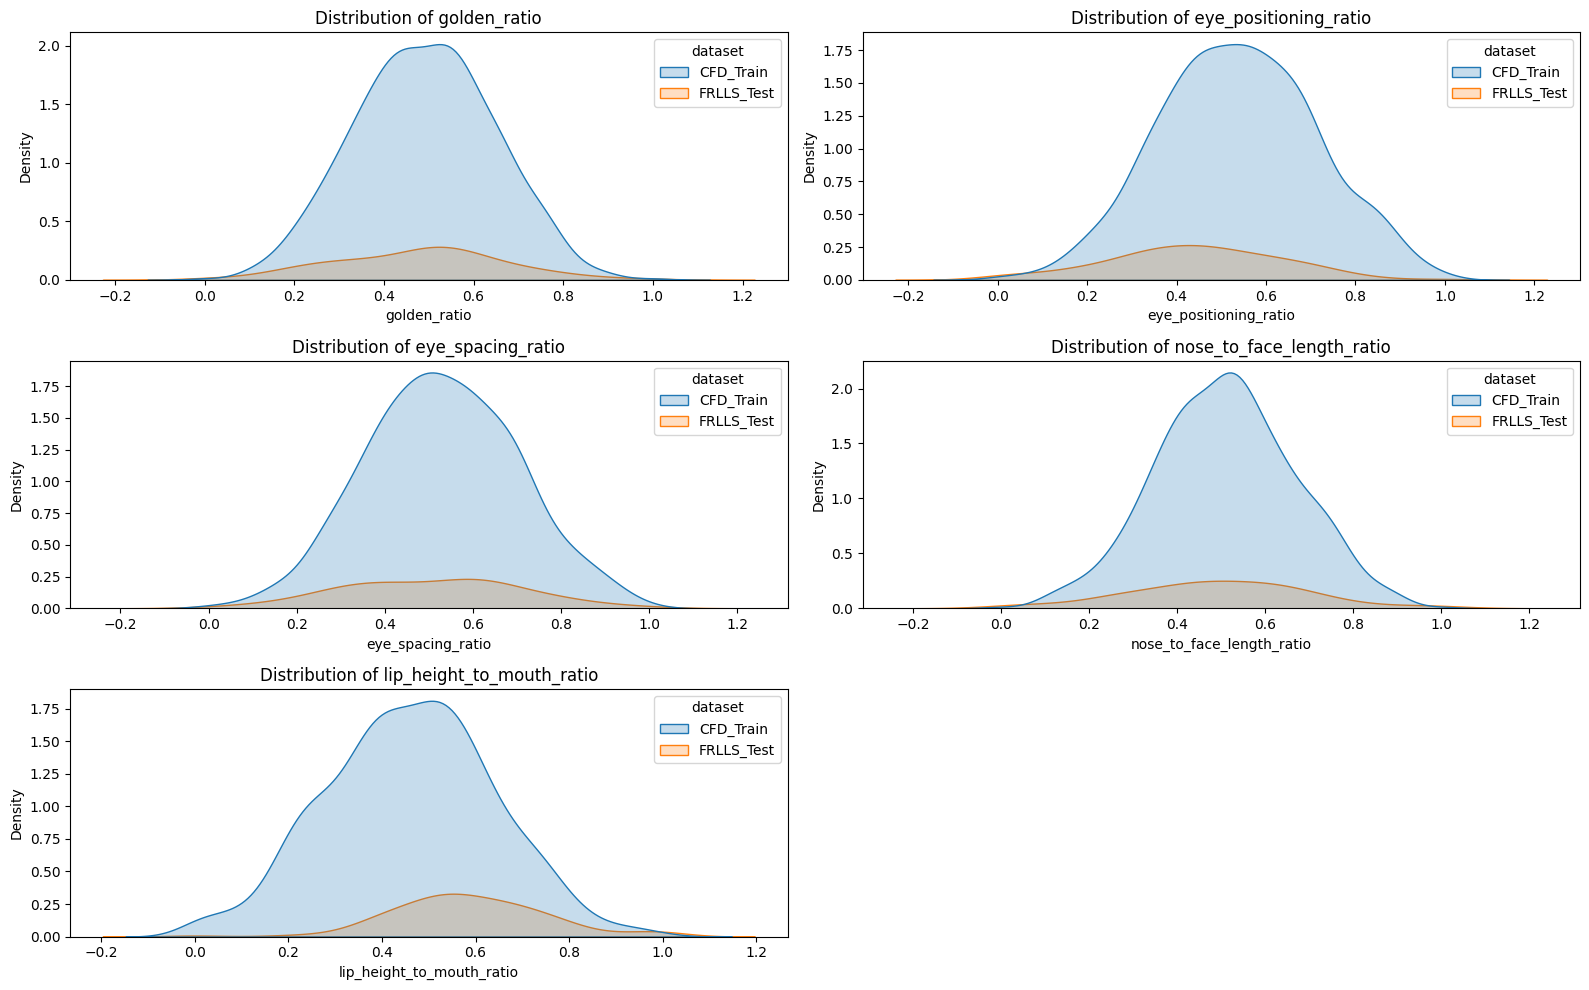

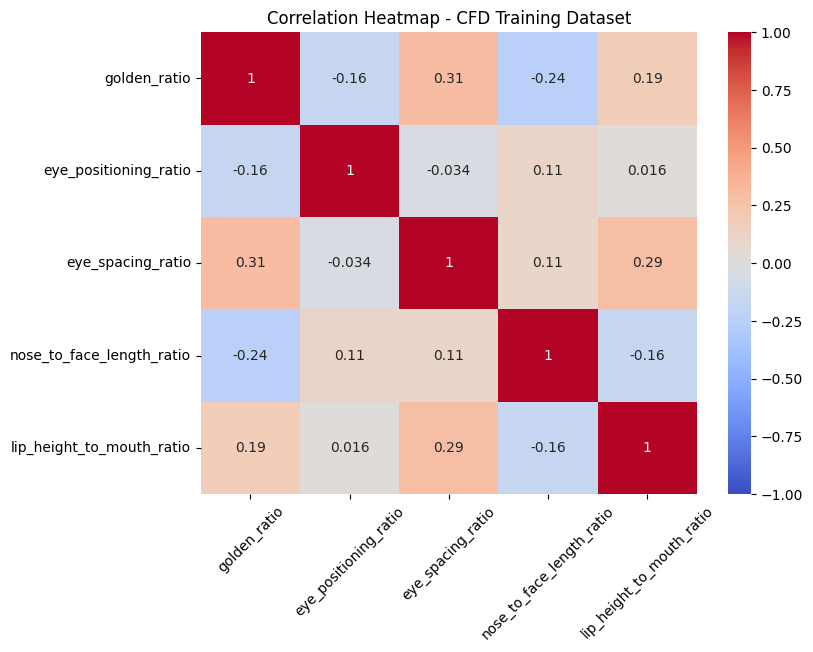

Variance Inflation Factor (VIF):
                      Feature        VIF
0               golden_ratio   9.560708
1      eye_positioning_ratio   8.251249
2          eye_spacing_ratio  12.826486
3  nose_to_face_length_ratio   8.759453
4  lip_height_to_mouth_ratio   7.810764
No pairs with correlation above 0.8 detected.

Descriptive Statistics for CFD Training Dataset (Selected Features):


golden_ratio  eye_positioning_ratio  eye_spacing_ratio  \
count      661.0000               661.0000           661.0000   
mean         0.4898                 0.5361             0.5290   
std          0.1561                 0.1760             0.1731   
min          0.0000                 0.0000             0.0000   
25%          0.3796                 0.4153             0.4070   
50%          0.4917                 0.5352             0.5266   
75%          0.5942                 0.6599             0.6559   
max          1.0000                 1.0000             1.0000   

       nose_to_face_length_ratio  lip_height_to_mouth_ratio  
count                   661.0000                   661.0000  
mean                      0.5085                     0.4595  
std                       0.1592                     0.1806  
min                       0.0000                     0.0000  
25%                       0.4053                     0.3382  
50%                       0.5092                     0.4653  
75%                       0.6130                     0.5791  
max                       1.0000                     1.0000


Descriptive Statistics for FRLLS Test Dataset (Selected Features):


golden_ratio  eye_positioning_ratio  eye_spacing_ratio  \
count      102.0000               102.0000           102.0000   
mean         0.4759                 0.4402             0.5038   
std          0.1913                 0.1925             0.2022   
min          0.0000                 0.0000             0.0000   
25%          0.3435                 0.3163             0.3612   
50%          0.5004                 0.4427             0.5252   
75%          0.6010                 0.5704             0.6388   
max          1.0000                 1.0000             1.0000   

       nose_to_face_length_ratio  lip_height_to_mouth_ratio  
count                   102.0000                   102.0000  
mean                      0.4917                     0.5862  
std                       0.2027                     0.1654  
min                       0.0000                     0.0000  
25%                       0.3650                     0.4907  
50%                       0.4906                     0.5696  
75%                       0.6256                     0.6879  
max                       1.0000                     1.0000

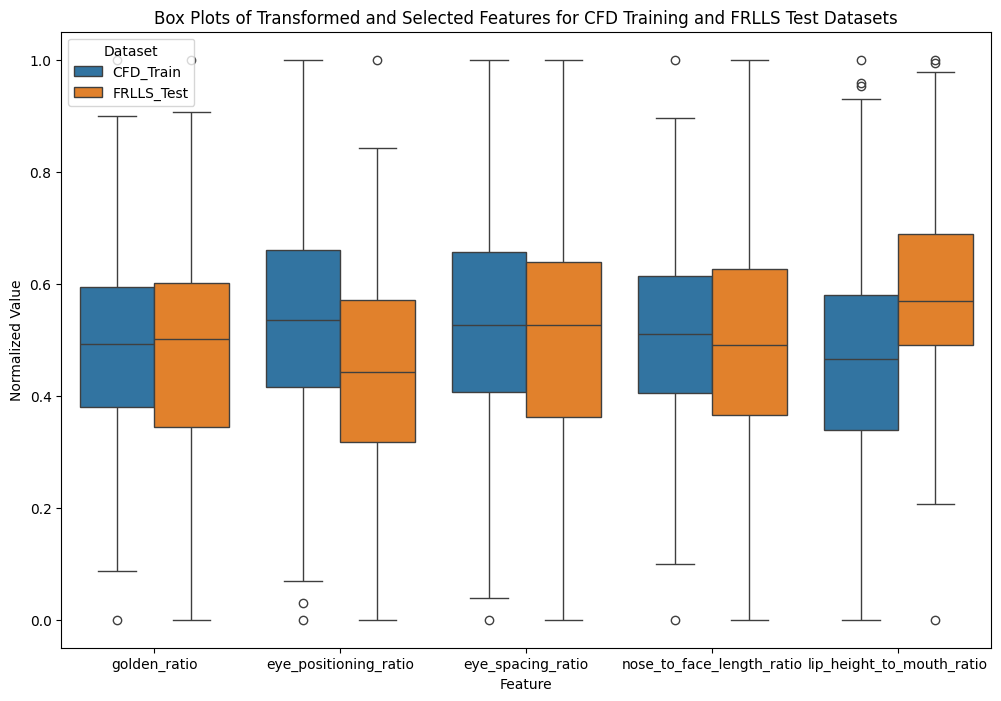

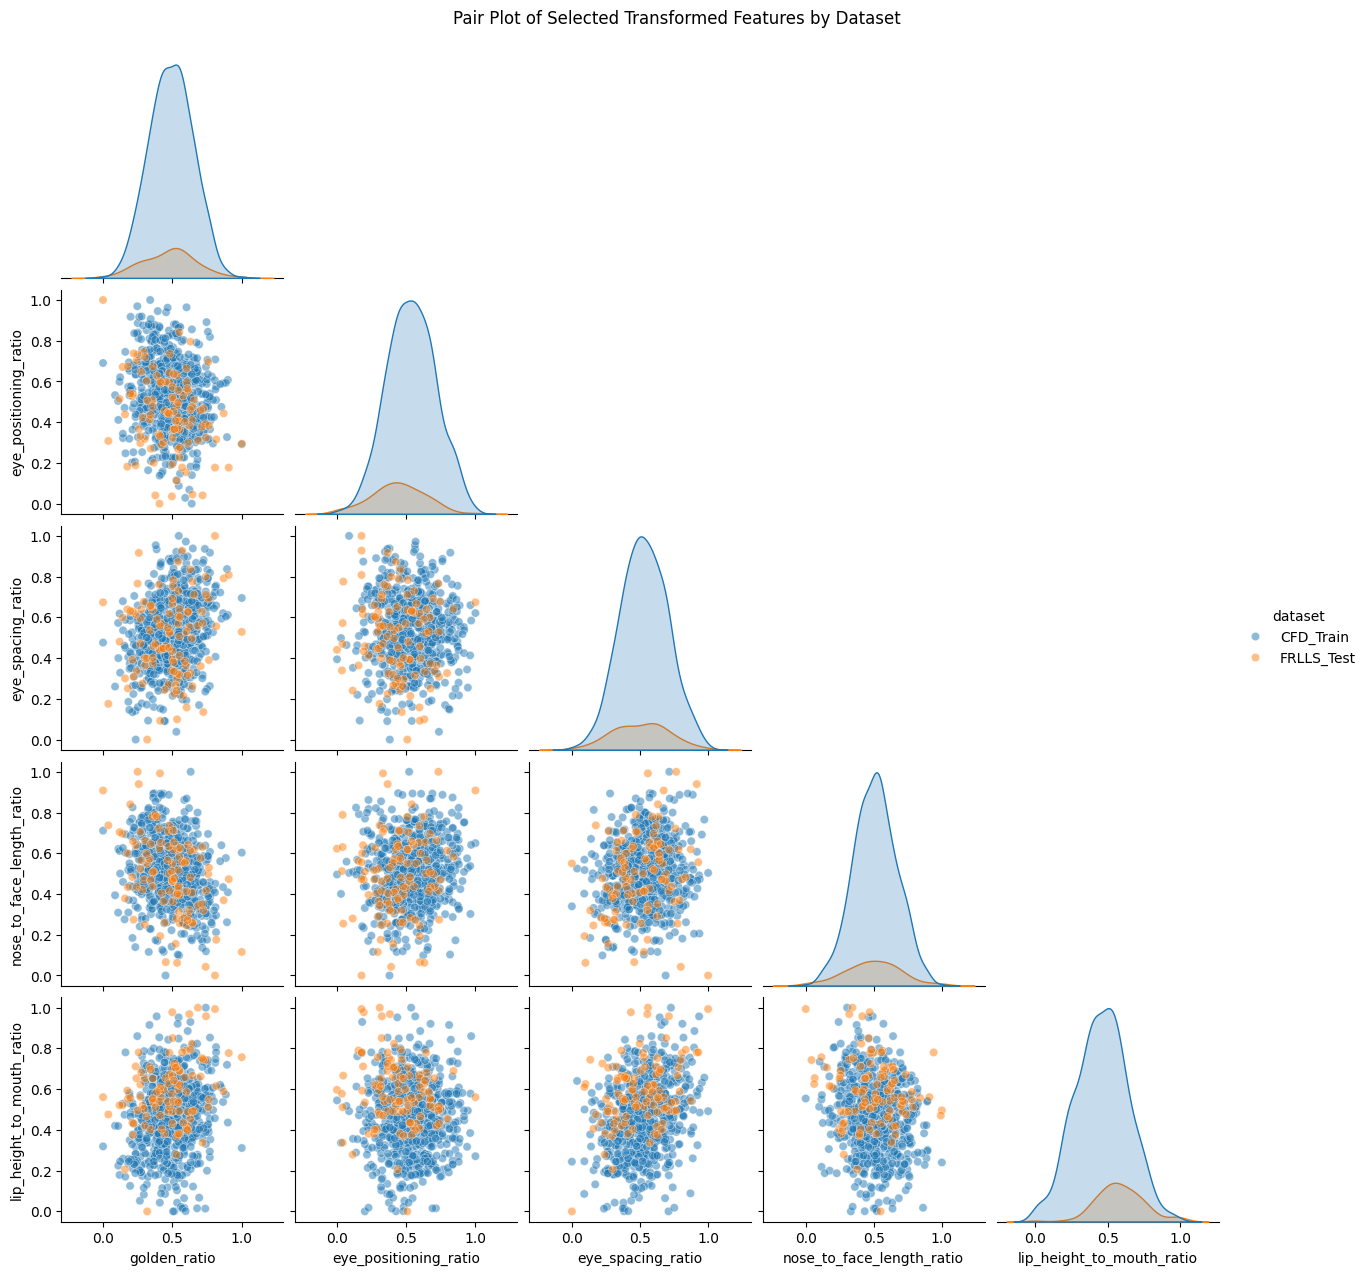

In [24]:
# EXPLORATORY DATA ANALYSIS OF SELECTED FEATURES
# Steps included are:
# 1. Visualizing feature distributions for each dataset to assess distribution differences.
# 2. Generating a correlation heatmap for the CFD training dataset to identify potential feature dependencies.
# 3. Calculating Variance Inflation Factor (VIF) to assess multi-collinearity among features in the CFD training dataset.
# 4. Displaying pairwise scatterplots for highly correlated feature pairs (if any).
# 5. Showing descriptive statistics (mean, std, etc.) for selected features in each dataset.
# 6. Visualizing feature distributions via box plots for a comparative view across datasets.
# 7. Creating pair plots to explore relationships among features, color-coded by dataset.

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Ensure the independently transformed datasets are used
# Use selected features identified during feature selection
X_train = transformed_train_df[selected_features]
X_frlls = transformed_frlls_df[selected_features]

# Step 1: Combine the datasets for EDA and add a 'dataset' identifier column
X_combined = pd.concat(
    [X_train.assign(dataset='CFD_Train'), X_frlls.assign(dataset='FRLLS_Test')],
    ignore_index=True
)

# 1. Feature Distributions for Each Dataset
plt.figure(figsize=(16, 10))
for i, feature in enumerate(selected_features, 1):
    plt.subplot(3, 2, i)
    sns.kdeplot(data=X_combined, x=feature, hue='dataset', fill=True)
    plt.title(f"Distribution of {feature}")
plt.tight_layout()
plt.show()

# 2. Pairwise Correlation Heatmap for the CFD Training Dataset
plt.figure(figsize=(8, 6))
sns.heatmap(X_train.corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.xticks(rotation=45)
plt.title("Correlation Heatmap - CFD Training Dataset")
plt.show()

# 3. Multi-collinearity Check: Variance Inflation Factor (VIF)
vif_data = pd.DataFrame()
vif_data["Feature"] = X_train.columns
vif_data["VIF"] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
print("Variance Inflation Factor (VIF):\n", vif_data)

# 4. Pairwise Scatterplots for Highly Correlated Feature Pairs in CFD Training Set
high_corr_pairs = [
    (f1, f2) for f1 in X_train.columns for f2 in X_train.columns
    if f1 != f2 and abs(X_train.corr().loc[f1, f2]) > 0.8
]
if high_corr_pairs:
    print("\nHighly correlated feature pairs:\n", high_corr_pairs)
    plt.figure(figsize=(16, 12))
    for i, (f1, f2) in enumerate(high_corr_pairs[:10], 1):  # Display up to 10 pairs
        plt.subplot(5, 2, i)
        sns.scatterplot(data=X_combined, x=f1, y=f2, hue='dataset')
        plt.title(f"{f1} vs {f2}")
    plt.tight_layout()
    plt.show()
else:
    print("No pairs with correlation above 0.8 detected.")

# 5. Descriptive Statistics for Each Dataset
pd.options.display.float_format = '{:.4f}'.format  # Suppress scientific notation for readability

print("\nDescriptive Statistics for CFD Training Dataset (Selected Features):")
display(X_train.describe())

print("\nDescriptive Statistics for FRLLS Test Dataset (Selected Features):")
display(X_frlls.describe())

# Reset display options after displaying descriptive statistics
pd.reset_option('display.float_format')

# 6. Box Plots for Each Feature by Dataset
plt.figure(figsize=(12, 8))
sns.boxplot(data=X_combined.melt(id_vars='dataset'), x='variable', y='value', hue='dataset')
plt.xticks(rotation=0)
plt.title("Box Plots of Transformed and Selected Features for CFD Training and FRLLS Test Datasets")
plt.ylabel("Normalized Value")
plt.xlabel("Feature")
plt.legend(title='Dataset')
plt.show()

# 7. Pair Plot for Each Feature (Colored by Dataset)
sns.pairplot(X_combined, hue='dataset', plot_kws={'alpha': 0.5}, corner=True)
plt.suptitle("Pair Plot of Selected Transformed Features by Dataset", y=1.02)
plt.show()


### Metrics Definitions

1. **Accuracy**:  
   The ratio of correctly predicted instances to the total number of instances.  
   Formula:  
   $$
   \text{Accuracy} = \frac{\text{True Positives} + \text{True Negatives}}{\text{Total Instances}}
   $$

2. **Precision**:  
   The proportion of positive predictions that are actually correct (how precise the positive predictions are).  
   Formula:  
   $$
   \text{Precision} = \frac{\text{True Positives}}{\text{True Positives} + \text{False Positives}}
   $$

3. **Recall (Sensitivity)**:  
   The proportion of actual positives that are correctly identified (also known as True Positive Rate).  
   Formula:  
   $$
   \text{Recall} = \frac{\text{True Positives}}{\text{True Positives} + \text{False Negatives}}
   $$

4. **F1 Score**:  
   The harmonic mean of Precision and Recall, balancing both metrics. It ranges from 0 (worst) to 1 (best).  
   Formula:  
   $$
   \text{F1 Score} = 2 \times \frac{\text{Precision} \times \text{Recall}}{\text{Precision} + \text{Recall}}
   $$


In [11]:
# This script evaluates the performance of multiple classifiers, including a Voting Classifier, 
# on a CFD validation set and an independent FRLLS test set. 
# Key steps:
# 1. **Dataset Preparation**: Extract features (X) and target variable (y) from transformed datasets.
#    - CFD dataset is split into training and validation subsets.
#    - FRLLS dataset is used as an independent test set.
# 2. **Classifier Definition**: Define individual classifiers and a Voting Classifier.
#    - The Voting Classifier combines the predictions of multiple models for ensemble performance.
# 3. **Training and Evaluation**:
#    - Each classifier is trained on the CFD training set and evaluated on:
#      - Validation set (for intermediate performance analysis).
#      - Test set (to assess generalization to unseen data).
# 4. **Performance Summary**:
#    - A consolidated summary table of validation and test metrics is displayed first.
# 5. **Detailed Results**:
#    - Individual classifier results (metrics and classification reports) are printed for detailed analysis.

import pandas as pd
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# Step 1: Filter the CFD and FRLLS datasets to include only the selected features
X_train = transformed_train_df[selected_features]
y_train = transformed_train_df['SexBinary']

X_val = transformed_val_df[selected_features]
y_val = transformed_val_df['SexBinary']

X_frlls = transformed_frlls_df[selected_features]
y_frlls = transformed_frlls_df['SexBinary']

# Step 2: Define individual classifiers and the Voting Classifier
classifiers = {
    "Dummy (Random Guessing)": DummyClassifier(strategy="uniform", random_state=42),
    "Logistic Regression": LogisticRegression(random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=50, max_depth=5, random_state=42),
    "SVM": SVC(kernel='linear', probability=True, random_state=42),  # probability=True for soft voting compatibility
    "K-Nearest Neighbors": KNeighborsClassifier(n_neighbors=5),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
    "Naive Bayes": GaussianNB()
}

# Voting Classifier combines the predictions of individual classifiers
voting_clf = VotingClassifier(estimators=[
    ('log_reg', LogisticRegression(random_state=42)),
    ('random_forest', RandomForestClassifier(n_estimators=50, max_depth=5, random_state=42)),
    ('svm', SVC(kernel='linear', probability=True, random_state=42)),
    ('knn', KNeighborsClassifier(n_neighbors=5)),
    ('grad_boost', GradientBoostingClassifier(random_state=42)),
    ('naive_bayes', GaussianNB())
], voting='hard')

# Add the Voting Classifier to the list of classifiers for unified evaluation
classifiers["Voting Classifier"] = voting_clf

# Step 3: Initialize a list to store overall results for the summary
results = []

# Step 4: Train and evaluate each classifier, collecting metrics for the summary and detailed results
for name, clf in classifiers.items():
    # Train on CFD training set
    clf.fit(X_train, y_train)

    # Evaluate on CFD validation set
    y_val_pred = clf.predict(X_val)
    val_accuracy = accuracy_score(y_val, y_val_pred)
    val_precision = precision_score(y_val, y_val_pred, average='macro')
    val_recall = recall_score(y_val, y_val_pred, average='macro')
    val_f1 = f1_score(y_val, y_val_pred, average='macro')

    # Evaluate on FRLLS test set
    y_frlls_pred = clf.predict(X_frlls)
    test_accuracy = accuracy_score(y_frlls, y_frlls_pred)
    test_precision = precision_score(y_frlls, y_frlls_pred, average='macro')
    test_recall = recall_score(y_frlls, y_frlls_pred, average='macro')
    test_f1 = f1_score(y_frlls, y_frlls_pred, average='macro')

    # Append summary results
    results.append({
        'Classifier': name,
        'Validation Accuracy': val_accuracy,
        'Test Accuracy': test_accuracy
    })

# Step 5: Create and sort the summary table
summary_df = pd.DataFrame(results)

# Round accuracy columns to two decimal places for sorting
summary_df['Validation Accuracy'] = summary_df['Validation Accuracy'].round(2)
summary_df['Test Accuracy'] = summary_df['Test Accuracy'].round(2)

# Sort by Test Accuracy (descending) and Validation Accuracy (descending)
summary_df = summary_df.sort_values(
    by=['Test Accuracy', 'Validation Accuracy'],
    ascending=[False, False]
).reset_index(drop=True)

# Format floats for better readability
pd.set_option('display.float_format', '{:.2f}'.format)

# Display the sorted summary table
print("\nClassifier Performance Summary (Validation and Test, Sorted By Test):")
display(summary_df)

# Step 6: Display detailed individual classifier results
for name, clf in classifiers.items():
    # Evaluate on CFD validation set
    y_val_pred = clf.predict(X_val)
    print(f"\n{name} - CFD Validation Results with Selected Features:")
    print(f"Accuracy: {accuracy_score(y_val, y_val_pred):.4f}")
    print(f"Precision: {precision_score(y_val, y_val_pred, average='macro'):.4f}")
    print(f"Recall: {recall_score(y_val, y_val_pred, average='macro'):.4f}")
    print(f"F1 Score: {f1_score(y_val, y_val_pred, average='macro'):.4f}")
    print(classification_report(y_val, y_val_pred))

    # Evaluate on FRLLS test set
    y_frlls_pred = clf.predict(X_frlls)
    print(f"\n{name} - FRLLS Test Results with Selected Features:")
    print(f"Accuracy: {accuracy_score(y_frlls, y_frlls_pred):.4f}")
    print(f"Precision: {precision_score(y_frlls, y_frlls_pred, average='macro'):.4f}")
    print(f"Recall: {recall_score(y_frlls, y_frlls_pred, average='macro'):.4f}")
    print(f"F1 Score: {f1_score(y_frlls, y_frlls_pred, average='macro'):.4f}")
    print(classification_report(y_frlls, y_frlls_pred))



Classifier Performance Summary (Validation and Test, Sorted By Test):


Classifier  Validation Accuracy  Test Accuracy
0                      SVM                 0.71           0.79
1      Logistic Regression                 0.73           0.78
2        Voting Classifier                 0.70           0.78
3        Gradient Boosting                 0.67           0.76
4              Naive Bayes                 0.70           0.75
5            Random Forest                 0.69           0.75
6      K-Nearest Neighbors                 0.69           0.68
7  Dummy (Random Guessing)                 0.49           0.53


Dummy (Random Guessing) - CFD Validation Results with Selected Features:
Accuracy: 0.4880
Precision: 0.4886
Recall: 0.4887
F1 Score: 0.4878
              precision    recall  f1-score   support

           0       0.50      0.46      0.48        85
           1       0.48      0.52      0.50        81

    accuracy                           0.49       166
   macro avg       0.49      0.49      0.49       166
weighted avg       0.49      0.49      0.49       166


Dummy (Random Guessing) - FRLLS Test Results with Selected Features:
Accuracy: 0.5294
Precision: 0.5275
Recall: 0.5271
F1 Score: 0.5265
              precision    recall  f1-score   support

           0       0.51      0.47      0.49        49
           1       0.54      0.58      0.56        53

    accuracy                           0.53       102
   macro avg       0.53      0.53      0.53       102
weighted avg       0.53      0.53      0.53       102


Logistic Regression - CFD Validation Results with Selected Features

In [12]:
# This cell performs 5-fold cross-validation on the CFD training dataset for each classifier to evaluate model stability and generalization.
# Step 1: Use cross_val_score to compute the accuracy scores for each classifier over 5 folds.
# Step 2: For each classifier, print the individual cross-validation scores, mean accuracy, and standard deviation.
#         The mean accuracy provides an overall performance metric, while the standard deviation indicates consistency across folds.
# Results help identify which models perform best and most consistently, aiding in model selection for further testing on the FRLLS dataset.

from sklearn.model_selection import cross_val_score

# Cross-validation setup
cv_results = {}

# Perform 5-fold cross-validation on the CFD dataset for each classifier
for name, clf in classifiers.items():
    scores = cross_val_score(clf, X_train_rfe, y_train, cv=5, scoring='accuracy')
    cv_results[name] = scores
    scores_rounded = [f"{score:.3f}" for score in scores]  # Round individual scores to 3 decimal places
    print(f"{name} - Cross-Validation Accuracy Scores: {', '.join(scores_rounded)}")
    print(f"{name} - Mean CV Accuracy: {scores.mean():.3f}, Std Dev: {scores.std():.3f}\n")

# Cross-validation summary
cv_summary = []

# Aggregate results for all classifiers
for name, clf in classifiers.items():
    scores = cross_val_score(clf, X_train_rfe, y_train, cv=5, scoring='accuracy')
    cv_summary.append({
        "Classifier": name,
        "Mean Accuracy": round(scores.mean(), 2),  # Round mean accuracy to 2 decimal places
        "Std Dev": round(scores.std(), 2),        # Round standard deviation to 2 decimal places
        "CV Scores": [round(score, 2) for score in scores]  # Round individual CV scores
    })

# Convert cross-validation results to DataFrame
cv_summary_df = pd.DataFrame(cv_summary)

# Reorder columns for display
cv_summary_df = cv_summary_df[["Classifier", "Mean Accuracy", "Std Dev"]]  

# Sort by Mean Accuracy (descending) and Std Dev (ascending)
cv_summary_df = cv_summary_df.sort_values(
    by=["Mean Accuracy", "Std Dev"], 
    ascending=[False, True]
).reset_index(drop=True)  # Reset the index for a clean display

# Display the sorted summary table
print("\nSummary of Cross-Validation Results (Sorted):")
display(cv_summary_df)


Dummy (Random Guessing) - Cross-Validation Accuracy Scores: 0.474, 0.530, 0.470, 0.485, 0.470
Dummy (Random Guessing) - Mean CV Accuracy: 0.486, Std Dev: 0.023

Logistic Regression - Cross-Validation Accuracy Scores: 0.729, 0.659, 0.803, 0.750, 0.780
Logistic Regression - Mean CV Accuracy: 0.744, Std Dev: 0.050

Random Forest - Cross-Validation Accuracy Scores: 0.684, 0.667, 0.803, 0.758, 0.788
Random Forest - Mean CV Accuracy: 0.740, Std Dev: 0.055

SVM - Cross-Validation Accuracy Scores: 0.707, 0.674, 0.811, 0.765, 0.780
SVM - Mean CV Accuracy: 0.747, Std Dev: 0.050

K-Nearest Neighbors - Cross-Validation Accuracy Scores: 0.639, 0.667, 0.750, 0.727, 0.705
K-Nearest Neighbors - Mean CV Accuracy: 0.698, Std Dev: 0.040

Gradient Boosting - Cross-Validation Accuracy Scores: 0.692, 0.652, 0.795, 0.750, 0.742
Gradient Boosting - Mean CV Accuracy: 0.726, Std Dev: 0.050

Naive Bayes - Cross-Validation Accuracy Scores: 0.722, 0.674, 0.811, 0.765, 0.727
Naive Bayes - Mean CV Accuracy: 0.740, S

Classifier  Mean Accuracy  Std Dev
0        Voting Classifier           0.75     0.04
1                      SVM           0.75     0.05
2      Logistic Regression           0.74     0.05
3            Random Forest           0.74     0.05
4              Naive Bayes           0.74     0.05
5        Gradient Boosting           0.73     0.05
6      K-Nearest Neighbors           0.70     0.04
7  Dummy (Random Guessing)           0.49     0.02